In [1]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
from gspread_formatting import *
from collections import Counter
import numpy as np
import time

import json
import urllib.request

import pandas as pd
import datetime as dt
import requests
from bs4 import BeautifulSoup

import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
from matplotlib import ticker
import matplotlib.ticker as mtick
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as mtick

from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import itertools as it

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rc('axes', axisbelow=True)
%matplotlib inline

In [2]:
today = time.strftime("%Y-%m-%d")

month_dict = {'01':'Jan','02':'Feb','03':'Mar','04':'Apr','05':'May','06':'Jun',
              '07':'Jul','08':'Aug','09':'Sep','10':'Oct','11':'Nov','12':'Dec'}

weekday_mapping = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

alldates = pd.date_range(start='2020-01-06', end='2021-12-31').tolist()
datelist = [str(i.date()) for i in alldates]
weekdays = [weekday_mapping[i.date().weekday()] for i in alldates]
weeklist = [i//7 for i in range(len(alldates))]
DATE_DF = pd.DataFrame({'date':datelist,'day':weekdays,'week':weeklist})
DATERANGE = DATE_DF['date'].tolist()

date_dict = {DATERANGE[i]:i for i in range(len(DATERANGE))}

dates_tt = ['2020-09-01','2020-10-01','2020-11-01','2020-12-01','2021-01-01','2021-02-01',
            '2021-03-01','2021-04-01','2021-05-01']
dates_ll = ['Sep','Oct','Nov','Dec','2021','Feb','Mar','Apr','May']

In [3]:
import json
import urllib.request

all_state_names = {'ak': 'Alaska', 'al': 'Alabama', 'ar': 'Arkansas',
                   'as': 'American Samoa',  'az': 'Arizona',
                   'ca': 'California', 'co': 'Colorado',
                   'ct': 'Connecticut', 'dc': 'District of Columbia',
                   'de': 'Delaware', 'fl': 'Florida', 'ga': 'Georgia',
                   'gu': 'Guam', 'hi': 'Hawaii', 'ia': 'Iowa',
                   'id': 'Idaho', 'il': 'Illinois', 'in': 'Indiana',
                   'ks': 'Kansas', 'ky': 'Kentucky', 'la': 'Louisiana',
                   'ma': 'Massachusetts', 'md': 'Maryland', 'me': 'Maine',
                   'mi': 'Michigan', 'mn': 'Minnesota', 'mo': 'Missouri',
                   'mp': 'Northern Mariana Islands', 'ms': 'Mississippi',
                   'mt': 'Montana', 'nc': 'North Carolina',
                   'nd': 'North Dakota', 'ne': 'Nebraska',
                   'nh': 'New Hampshire', 'nj': 'New Jersey',
                   'nm': 'New Mexico', 'nv': 'Nevada', 'ny': 'New York',
                   'oh': 'Ohio', 'ok': 'Oklahoma', 'or': 'Oregon',
                   'pa': 'Pennsylvania', 'pr': 'Puerto Rico',
                   'ri': 'Rhode Island', 'sc': 'South Carolina',
                   'sd': 'South Dakota', 'tn': 'Tennessee', 'tx': 'Texas',
                   'ut': 'Utah', 'va': 'Virginia',
                   'vi': 'Virgin Islands', 'vt': 'Vermont',
                   'wa': 'Washington', 'wi': 'Wisconsin',
                   'wv': 'West Virginia', 'wy': 'Wyoming'}

all_state_ids = {'01': 'al', '02': 'ak', '04': 'az', '05': 'ar',
                 '06': 'ca', '08': 'co', '09': 'ct', '10': 'de',
                 '11': 'dc', '12': 'fl', '13': 'ga', '15': 'hi',
                 '16': 'id', '17': 'il', '18': 'in', '19': 'ia',
                 '20': 'ks', '21': 'ky', '22': 'la', '23': 'me',
                 '24': 'md', '25': 'ma', '26': 'mi', '27': 'mn',
                 '28': 'ms', '29': 'mo', '30': 'mt', '31': 'ne',
                 '32': 'nv', '33': 'nh', '34': 'nj', '35': 'nm',
                 '36': 'ny', '37': 'nc', '38': 'nd', '39': 'oh',
                 '40': 'ok', '41': 'or', '42': 'pa', '44': 'ri',
                 '45': 'sc', '46': 'sd', '47': 'tn', '48': 'tx',
                 '49': 'ut', '50': 'vt', '51': 'va', '53': 'wa',
                 '54': 'wv', '55': 'wi', '56': 'wy', "60": 'as',
                 "66": 'gu', "72": 'pr', '78': 'vi', '69': 'mp'}

all_ids_state = {j:i for i,j in all_state_ids.items()}
all_names_state = {j:i for i,j in all_state_names.items()}

state_posx = {'ak': (0, 0), 'me': (0, 10),#'gu': (7, 0), 'vi': (7, 9), 'pr': (7, 8), 'mp': (7, 1),
              'vt': (1, 9), 'nh': (1, 10),'wa': (2, 0), 'id': (2, 1), 'mt': (2, 2), 'nd': (2, 3), 'mn': (2, 4),
              'il': (2, 5), 'wi': (2, 6), 'mi': (2, 7), 'ny': (2, 8), 'ri': (2, 9), 'ma': (2, 10),'or': (3, 0),
              'nv': (3, 1), 'wy': (3, 2), 'sd': (3, 3), 'ia': (3, 4), 'in': (3, 5), 'oh': (3, 6), 'pa': (3, 7),
              'nj': (3, 8), 'ct': (3, 9), 'ca': (4, 0), 'ut': (4, 1), 'co': (4, 2), 'ne': (4, 3), 'mo': (4, 4),
              'ky': (4, 5), 'wv': (4, 6), 'va': (4, 7), 'md': (4, 8), 'de': (4, 9), 'az': (5, 1), 'nm': (5, 2), 
              'ks': (5, 3), 'ar': (5, 4), 'tn': (5, 5), 'nc': (5, 6), 'sc': (5, 7), 'dc': (5, 8), 'ok': (6, 3),
              'la': (6, 4), 'ms': (6, 5), 'al': (6, 6), 'ga': (6, 7), 'hi': (6, 0), 'tx': (7, 3), 'fl': (7, 7)}

data_names = ['cases','deaths','testing','vaccines','hospitalization']
base_url = 'https://jhucoronavirus.azureedge.net/api/v1/timeseries/us/'
stlist = []

for st_abbrev in [i.upper() for i in all_state_names.keys()]:
    if st_abbrev in ['VI']:
        continue
    dn = data_names[0]
    tmp_url = base_url + "%s/%s.json"%(dn, st_abbrev)
    with urllib.request.urlopen(tmp_url) as url_i:
        data_i = json.loads(url_i.read().decode())
    st_cases = pd.DataFrame({'date':list(data_i.keys()),
                  'new_%s'%dn: [i["raw_positives"] for i in data_i.values()],
                  'new_%s_7day_avg'%dn: [i['7-day_avg'] for i in data_i.values()]})

    dn = data_names[1]
    tmp_url = base_url + "%s/%s.json"%(dn, st_abbrev)
    with urllib.request.urlopen(tmp_url) as url_i:
        data_i = json.loads(url_i.read().decode())
    st_deaths = pd.DataFrame({'date':list(data_i.keys()),
                  'new_%s'%dn: [i["raw_positives"] for i in data_i.values()],
                  'new_%s_7day_avg'%dn: [i['7-day_avg'] for i in data_i.values()]})

    dn = data_names[2]
    tmp_url = base_url + "%s/%s.json"%(dn, st_abbrev)
    with urllib.request.urlopen(tmp_url) as url_i:
        data_i = json.loads(url_i.read().decode())
    st_tests = pd.DataFrame({'date':list(data_i.keys()),
                  'new_%s'%dn: [i["raw_tests"] for i in data_i.values()],
                  'new_%s_7day_avg'%dn: [i['7-day_avg_positivity'] for i in data_i.values()]})

    dn = data_names[3]
    tmp_url = base_url + "%s/%s.json"%(dn, st_abbrev)
    with urllib.request.urlopen(tmp_url) as url_i:
        data_i = json.loads(url_i.read().decode())
    st_vaccines = pd.DataFrame(data_i)
    st_vaccines = st_vaccines.rename(columns={'doses_admin_daily':'new_vaccines','7_day_avg':'new_vaccines_7day_avg'})

    dn = data_names[4]
    tmp_url = base_url + "%s/%s.json"%(dn, st_abbrev)
    with urllib.request.urlopen(tmp_url) as url_i:
        data_i = json.loads(url_i.read().decode())[0]
    st_hosp = pd.DataFrame({'date':list(data_i.keys()),
                  'new_%s'%dn: [i["inpatient_beds_used_covid"] for i in data_i.values()],
                  'new_%s_7day_avg'%dn: [i['7_day_avg'] for i in data_i.values()]})

    st_df = st_cases.merge(st_deaths, how='left', on='date')
    st_df = st_df.merge(st_tests, how='left', on='date')
    st_df = st_df.merge(st_vaccines, how='left', on='date')
    st_df = st_df.merge(st_hosp, how='left', on='date')
    st_df['state'] = all_state_names[st_abbrev.lower()]
    stlist.append(st_df)

ll = pd.concat(stlist).reset_index().iloc[:,1:]
ll = ll.merge(DATE_DF[['date','week']], how='left', on='date')

jhu_url = 'https://jhucoronavirus.azureedge.net/jhucoronavirus/state_vaccination_rates.json'
with urllib.request.urlopen(jhu_url) as url_i:
    data_i = json.loads(url_i.read().decode())

pop_df = []
for i in range(len(data_i)):
    tmp = data_i[i]['data']
    tmp['state'] = data_i[i]['state']
    pop_df.append(tmp)

pop_df = pd.DataFrame(pop_df)
pop_df['population'] = (pop_df['raw_full_vac'] / pop_df['percent_full_vac']).astype(int)

ll = ll.merge(pop_df[['state','population']], how='left', on='state')

In [4]:
# use creds to create a client to interact with the Google Drive API
scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']

creds = ServiceAccountCredentials.from_json_keyfile_name('../client_secret.json', scope)
client = gspread.authorize(creds)

usr_agent = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) '
                  'Chrome/61.0.3163.100 Safari/537.36'}

# Texas

In [146]:
tmp_data = client.open("COVID-data_tmp")
tmp_df = pd.DataFrame(tmp_data.worksheet('Sheet1').get_all_records(default_blank=np.nan))
tmp_df = tmp_df.merge(DATE_DF[['date','week']], how='left', on='date')

In [148]:
tx_data = client.open("COVID-data_Texas")
tx_worksheets = [tt.title for tt in list(tx_data.worksheets()) if tt.title!='state' and tt.title!='school_info']

state_df = pd.DataFrame(tx_data.worksheet('state').get_all_records(default_blank=np.nan))
state_df = state_df.merge(DATE_DF[['date','week']], how='left', on='date')
state_df = state_df[['date', 'new_cases_students', 'new_cases_employee',
                     'num_students_est', 'num_staff_est', 'week']].copy()

In [149]:
tx_dfg = state_df.copy()

ll_tx_g = ll.loc[ll['state']=='Texas'].groupby(['week']).agg({'new_cases':'sum',
                                         'new_deaths':'sum', 'population':'mean'}).reset_index()
ll_tx_g = ll_tx_g.rename(columns={'new_cases':'new_cases_state',
                                  'new_deaths':'new_deaths_state',
                                  'population':'population_state'})
tx_dfg = tx_dfg.merge(ll_tx_g, how='left', on='week')
tx_dfg['state'] = 'Texas'
tx_dfg['population_state'] = 29183290
tx_dfg = tx_dfg.merge(tmp_df[['state','week','wave']], how='left', on=['state','week'])
tx_dfg = tx_dfg.loc[~tx_dfg.wave.isna()].copy()

In [154]:
tx_dfg = tx_dfg[['date', 'week', 'wave', 'new_cases_students', 'new_cases_employee',
                 'new_cases_state', 'new_deaths_state', 'population_state', 'state']].copy()

# Massachusetts

In [155]:
ma_data = client.open("COVID-data_Massachusetts")
ma_data = pd.DataFrame(ma_data.worksheet('k12_schools').get_all_records(default_blank=np.nan))
ma_data = ma_data[['date','school_id','name','new_cases_students',
                   'new_cases_employee','details']].copy()
ma_data['new_cases_students'] = ma_data['new_cases_students'].astype(float)
ma_data['new_cases_employee'] = ma_data['new_cases_employee'].astype(float)
ma_data = pd.concat([ma_data,pd.DataFrame({'date':['2020-12-31'],'school_id':['no_data'],'name':['no_data'],
                      'new_cases_students':[0],'new_cases_employee':[0],'details':['no_data']})])
ma_data = ma_data.sort_values(['date','details','school_id']).reset_index().iloc[:,1:]

In [158]:
ma_dfg = ma_data.groupby('date').agg({'new_cases_employee':'sum',
                                     'new_cases_students':'sum'}).reset_index()
ma_dfg = ma_dfg.merge(DATE_DF[['date','week']], how='left', on='date')
ll_ma_g = ll.loc[ll['state']=='Massachusetts'].groupby(['week']).agg({'new_cases':'sum',
                                         'new_deaths':'sum', 'population':'mean'}).reset_index()
ll_ma_g = ll_ma_g.rename(columns={'new_cases':'new_cases_state',
                                  'new_deaths':'new_deaths_state',
                                  'population':'population_state'})
ma_dfg = ma_dfg.merge(ll_ma_g, how='left', on='week')

ma_dfg.loc[ma_dfg['date']=='2020-12-31','new_cases_employee'] = np.nan
ma_dfg.loc[ma_dfg['date']=='2020-12-31','new_cases_students'] = np.nan
ma_dfg.loc[ma_dfg['date']=='2021-02-18','new_cases_employee'] = np.nan
ma_dfg.loc[ma_dfg['date']=='2021-02-18','new_cases_students'] = np.nan
ma_dfg.loc[ma_dfg['date']=='2021-04-15','new_cases_students'] = np.nan
ma_dfg.loc[ma_dfg['date']=='2021-04-15','new_cases_employee'] = np.nan
ma_dfg.loc[ma_dfg['date']==ma_dfg['date'].max(),'new_cases_state'] = np.nan

ma_dfg['num_students_est'] = [452484,452484,476238,476238,464207,464207,461400,461400,467160,467160,467160,
                              467160,467160,467160,466975,466975,486514,486514,504272,504272,548162,548162,
                              591908,591908,581230,581230,642383,642383,675848,675848,693681,693681,693681,693681]
ma_dfg['num_staff_est'] = [75000]*26  + [85000,  115000, 125000, 125000, 125000, 135000, 135000, 140000]

ma_dfg['state'] = "Massachusetts"
ma_dfg['population_state'] = 6893000

ma_dfg = ma_dfg.merge(tmp_df[['state','week','wave']], how='left', on=['state','week'])
ma_dfg = ma_dfg.loc[~ma_dfg.wave.isna()].copy()

In [159]:
ma_dfg = ma_dfg[['date', 'week', 'wave', 'new_cases_students', 'new_cases_employee',
                 'new_cases_state', 'new_deaths_state', 'population_state', 'state']].copy()

# Florida

In [160]:
fld = client.open('COVID-data_Florida')
fl_schools = pd.DataFrame(fld.worksheet('schools').get_all_records(default_blank=np.nan))
fl_schools['cumulative_cases'] = fl_schools.groupby(['school','county','type'])['new_cases'].transform(lambda x: x.cumsum()) 
fl_schools['cumulative_cases_students'] = fl_schools.groupby(['school','county','type'])['new_cases_students'].transform(lambda x: x.cumsum()) 
fl_schools['cumulative_cases_teachers'] = fl_schools.groupby(['school','county','type'])['new_cases_teachers'].transform(lambda x: x.cumsum()) 
fl_schools['cumulative_cases_staff'] = fl_schools.groupby(['school','county','type'])['new_cases_staff'].transform(lambda x: x.cumsum()) 
fl_schools['cumulative_cases_unknown'] = fl_schools.groupby(['school','county','type'])['new_cases_unknown'].transform(lambda x: x.cumsum()) 

gbcol = ['school','county','date','start_date','type']
agcol = ['new_cases', 'new_cases_students', 'new_cases_teachers', 'new_cases_staff',
         'new_cases_unknown', 'symptoms_yes', 'symptoms_no', 'symptoms_idk',
         'cumulative_cases', 'cumulative_cases_students', 'cumulative_cases_teachers',
         'cumulative_cases_staff', 'cumulative_cases_unknown']

fl_dfg = fl_schools.loc[fl_schools['type']=='k12'].groupby('date').agg({i:'sum' for i in agcol}).reset_index()

fl_dfg['new_cases_employee'] = fl_dfg[['new_cases_teachers',
                                       'new_cases_staff','new_cases_unknown']].sum(axis=1)
fl_dfg = fl_dfg.merge(DATE_DF[['date','week']], how='left', on='date')

ll_fl_g = ll.loc[ll['state']=='Florida'].groupby(['week']).agg({'new_cases':'sum',
                                         'new_deaths':'sum', 'population':'mean'}).reset_index()
ll_fl_g = ll_fl_g.rename(columns={'new_cases':'new_cases_state',
                                  'new_deaths':'new_deaths_state',
                                  'population':'population_state'})
fl_dfg = fl_dfg.merge(ll_fl_g, how='left', on='week')

fl_dfg = fl_dfg.groupby('week').agg({'new_cases_employee':'sum',
                            'new_cases_students':'sum',
                            'new_cases_state':'sum',
                            'new_deaths_state':'sum',
                            'date':'min',
                            'population_state':'mean'}).reset_index()
fl_dfg['population_state'] = 21480000

In [161]:
fl_dfg['num_students_est'] = [1452228,1452228,1452228,1452228,1450277,1450277,1455956,1455956,1455956,1453107,
                              1453107,1453107,1453107,1453107,1453348,1453348,1451540,1451540,1823009,1823009,
                              1819218,1819218,1820205,1820205,1815848,1815848,1823165,1823165,1819555,1819555,
                              1819555,1819555,1819555]
fl_dfg['num_staff_est'] = 159643+167909

fl_dfg['state'] = "Florida"

fl_dfg = fl_dfg.merge(tmp_df[['state','week','wave']], how='left', on=['state','week'])
fl_dfg = fl_dfg.loc[~fl_dfg.wave.isna()].copy()

In [162]:
fl_dfg = fl_dfg[['date', 'week', 'wave', 'new_cases_students', 'new_cases_employee',
                 'new_cases_state', 'new_deaths_state', 'population_state', 'state']].copy()

# New York

In [163]:
ny_data = client.open("COVID-data_NewYork")

# ny_df = pd.DataFrame(ny_data.worksheet('summary').get_all_records(default_blank=np.nan))
ny_df = pd.DataFrame(ny_data.worksheet('k12_schools').get_all_records(default_blank=np.nan))
ny_df['date'] = ny_df['end_date']
ny_df = ny_df.merge(DATE_DF[['date','week']])
ny_df = ny_df.groupby(['week']).agg({'new_cases_students':'sum',
                                     'new_cases_employee':'sum', 'date':'min'}).reset_index()

ll_ny_g = ll.loc[ll['state']=='New York'].groupby(['week']).agg({'new_cases':'sum',
                                         'new_deaths':'sum', 'population':'mean'}).reset_index()
ll_ny_g = ll_ny_g.rename(columns={'new_cases':'new_cases_state',
                                  'new_deaths':'new_deaths_state',
                                  'population':'population_state'})
ny_dfg = ny_df.merge(ll_ny_g, how='left', on='week')

In [164]:
ny_dfg['num_students_est'] = [1332075, 1332075, 1520998, 1520998, 1394889, 1394889, 1394889, 1411260, 1411260, 1411260,
                              1411260, 1411260, 1413696, 1413696, 1528252, 1528252, 1602235, 1602235, 1654103, 1654103,
                              1649088, 1649088, 1636372, 1636372, 1675050, 1675050, 1761149, 1761149, 1770577, 1770577]
ny_dfg['num_staff_est'] = [350000,350000,532143,532143,514031,514031,514031,533827,533827,533827,
                           533827,533827,440476,440476,456841,456841,467954,467954,466964,466964,
                           708571,708571,501786,501786,516964,516964,513214,513214,497143,497143]

ny_dfg['state'] = "New York"
ny_dfg['population_state'] = 20201249

ny_dfg = ny_dfg.merge(tmp_df[['state','week','wave']], how='left', on=['state','week'])
ny_dfg = ny_dfg.loc[~ny_dfg.wave.isna()].copy()

In [165]:
ny_dfg = ny_dfg[['date', 'week', 'wave', 'new_cases_students', 'new_cases_employee',
                 'new_cases_state', 'new_deaths_state', 'population_state', 'state']].copy()

In [196]:
df = pd.concat([ny_dfg,ma_dfg,tx_dfg,fl_dfg])
# df = df.groupby(['state','week','population_state']).agg({'date':'min','new_cases_students':'sum','new_cases_employee':'sum',
#                                    'new_cases_state':'sum','new_deaths_state':'sum',
#                                    'num_students_est':'mean','num_staff_est':'mean'}).reset_index()
df = df.merge(tmp_df[['tot_students', 'num_students_est', 'num_staff_est', 'state', 'week']], how='left', on=['state','week'])

# df = df[['state', 'date', 'new_cases_students', 'new_cases_employee',
#        'new_cases_state', 'new_deaths_state', 'num_students_est',
#        'num_staff_est', 'population_state']].copy()
# df = pd.concat([ny_dfg,ma_dfg,tx_dfg,fl_dfg])
# df = df.groupby(['state','wave','population_state']).agg({'date':'min',
#                                               'new_cases_students':'sum','new_cases_employee':'sum',
#                                               'new_cases_state':'sum','new_deaths_state':'sum',
#                                               'num_students_est':'mean','num_staff_est':'mean',
#                                               'tot_students':'mean'}).reset_index()
df = df.groupby(['state','week','population_state']).agg({'date':'min',
                                              'new_cases_students':'sum','new_cases_employee':'sum',
                                              'new_cases_state':'sum','new_deaths_state':'sum',
                                              'num_students_est':'mean','num_staff_est':'mean',
                                              'tot_students':'mean'}).reset_index()
# df = df[['state', 'date', 'new_cases_students', 'new_cases_employee',
#        'new_cases_state', 'new_deaths_state', 'num_students_est',
#        'num_staff_est', 'population_state']].copy()

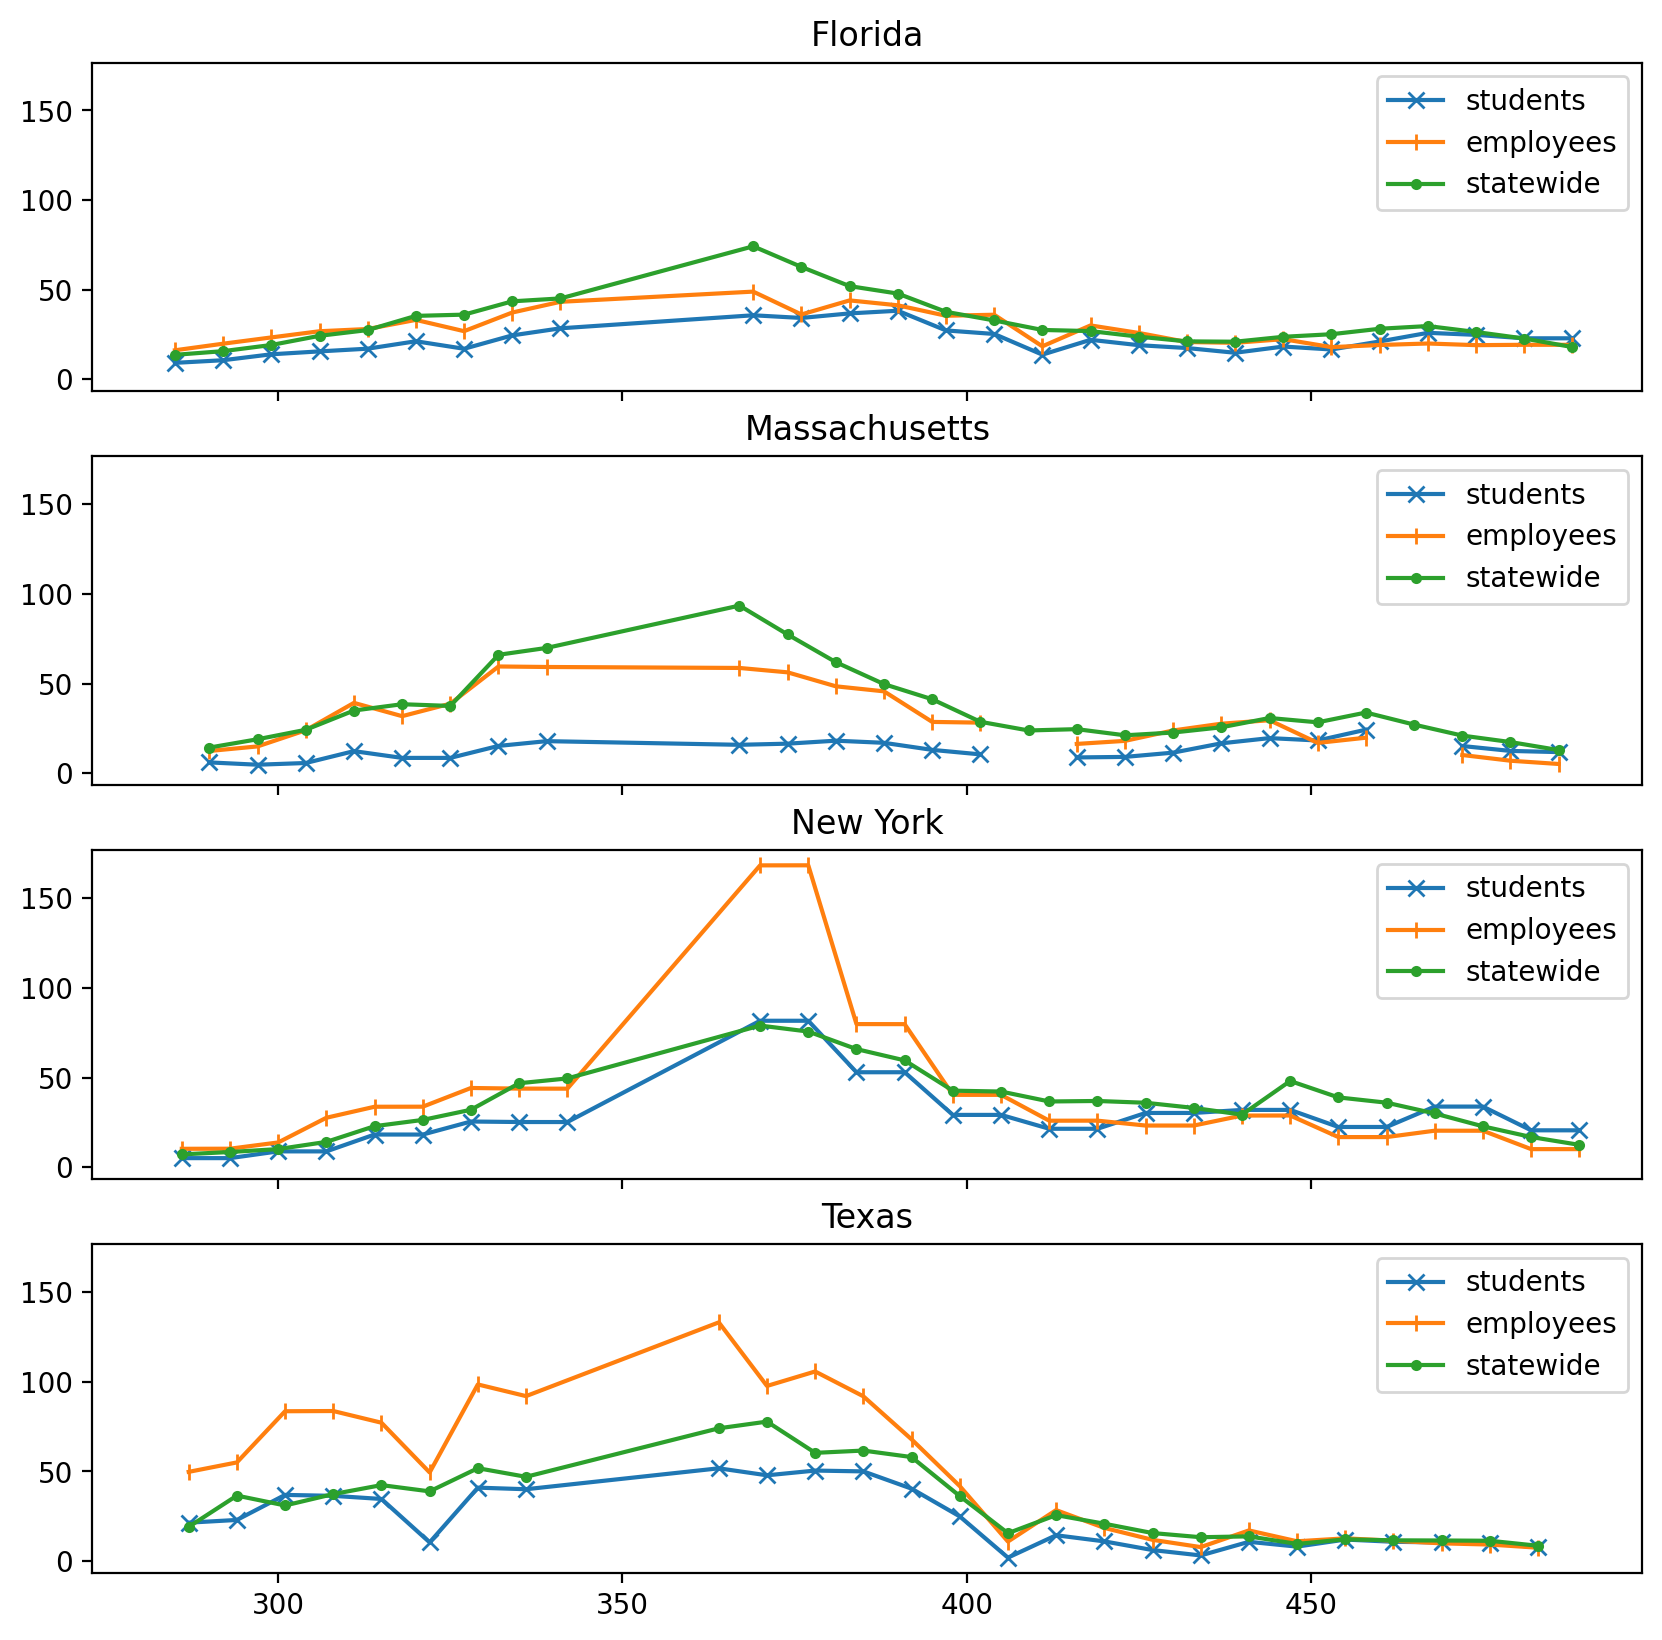

In [197]:
fig, ax = plt.subplots(4,1,figsize=(10,10),dpi=200,sharex=True,sharey=True)
for i,st in enumerate(df.state.unique()):
    st_df = df.loc[df['state']==st].copy()
    st_df.loc[st_df['new_cases_students']==0,'new_cases_students'] = np.nan
    st_df.loc[st_df['new_cases_employee']==0,'new_cases_employee'] = np.nan
    st_df = st_df.loc[st_df['date']>'2020-10-15'].copy()
    st_df['new_cases_students_per100k'] = st_df['new_cases_students'] / st_df['num_students_est'] * 100000 / 7
    st_df['new_cases_employee_per100k'] = st_df['new_cases_employee'] / st_df['num_staff_est'] * 100000 / 7
    st_df['new_cases_state_per100k'] = st_df['new_cases_state'] / st_df['population_state'] * 100000 / 7
#     st_df['new_cases_students_per100k'] = st_df['new_cases_students'] / st_df['num_students_est'] * 100000 / 14
#     st_df['new_cases_employee_per100k'] = st_df['new_cases_employee'] / st_df['num_staff_est'] * 100000 / 14
#     st_df['new_cases_state_per100k'] = st_df['new_cases_state'] / st_df['population_state'] * 100000 / 14
    ax[i].plot([date_dict[i] for i in st_df['date']], st_df['new_cases_students_per100k'].rolling(window=1).mean(),
               label='students', marker='x')
    ax[i].plot([date_dict[i] for i in st_df['date']], st_df['new_cases_employee_per100k'].rolling(window=1).mean(),
               label='employees', marker='|')
    ax[i].plot([date_dict[i] for i in st_df['date']], st_df['new_cases_state_per100k'].rolling(window=1).mean(),
               label='statewide', marker='.')
    ax[i].set_title(st)
    
    ax[i].legend()
    ax[i].set_xlim(date_dict['2020-10-05'])


plt.show()

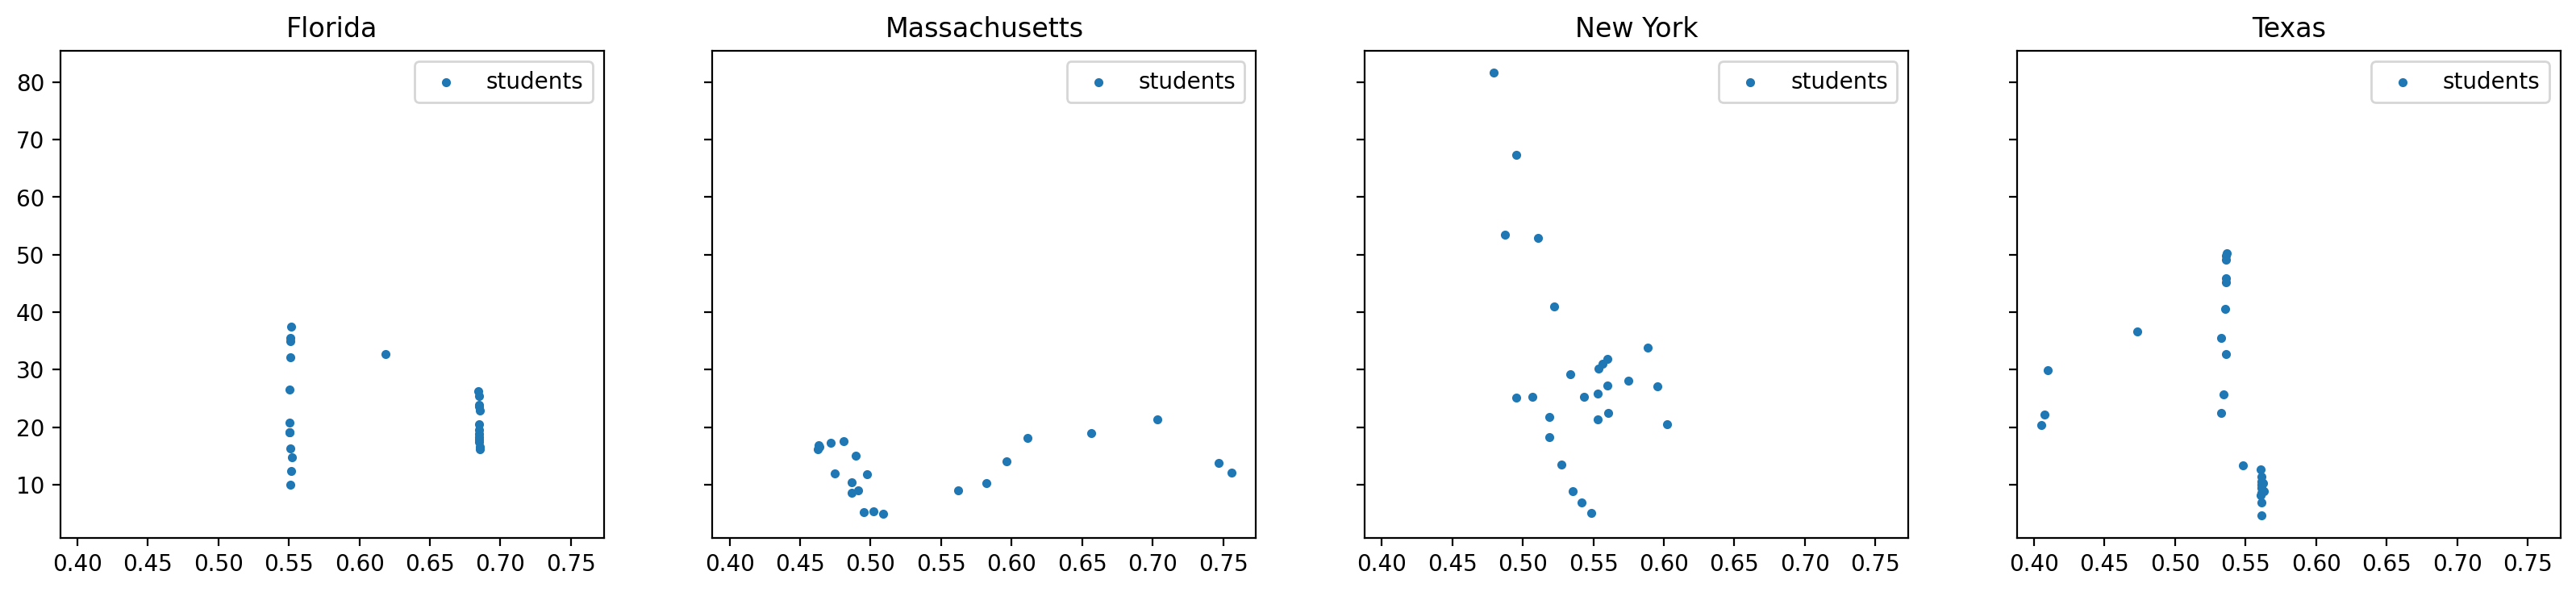

In [198]:
wid = 2
fig, ax = plt.subplots(1,4,figsize=(20,4),dpi=200,sharey=True,sharex=True)
for i,st in enumerate(df.state.unique()):
    st_df = df.loc[df['state']==st].copy()
    st_df.loc[st_df['new_cases_students']==0,'new_cases_students'] = np.nan
    st_df.loc[st_df['new_cases_employee']==0,'new_cases_employee'] = np.nan
    st_df = st_df.loc[st_df['date']>'2020-10-10'].copy()
    st_df['new_cases_students_per100k'] = st_df['new_cases_students'] / st_df['num_students_est'] * 100000 / 7
    st_df['new_cases_employee_per100k'] = st_df['new_cases_employee'] / st_df['num_staff_est'] * 100000 / 7
    st_df['new_cases_state_per100k'] = st_df['new_cases_state'] / st_df['population_state'] * 100000 / 7
    rfa = st_df['new_cases_students_per100k'].rolling(window=wid).mean()
#     rfa = rfa / st_df['new_cases_state_per100k'].rolling(window=wid).mean()
    xfa = st_df['num_students_est'].rolling(window=wid).mean()/st_df['tot_students'].rolling(window=wid).mean()
    ax[i].scatter(xfa, rfa, label='students', marker='.')
#     ax[i].plot([date_dict[i] for i in st_df['date']], st_df['new_cases_employee_per100k'].rolling(window=3).mean(),
#                label='employees', marker='|')
#     ax[i].plot([date_dict[i] for i in st_df['date']], st_df['new_cases_state_per100k'].rolling(window=3).mean(),
#                label='statewide', marker='.')
    ax[i].set_title(st)
    
    ax[i].legend()
#     ax[i].set_xlim(date_dict['2020-10-05'])


plt.show()

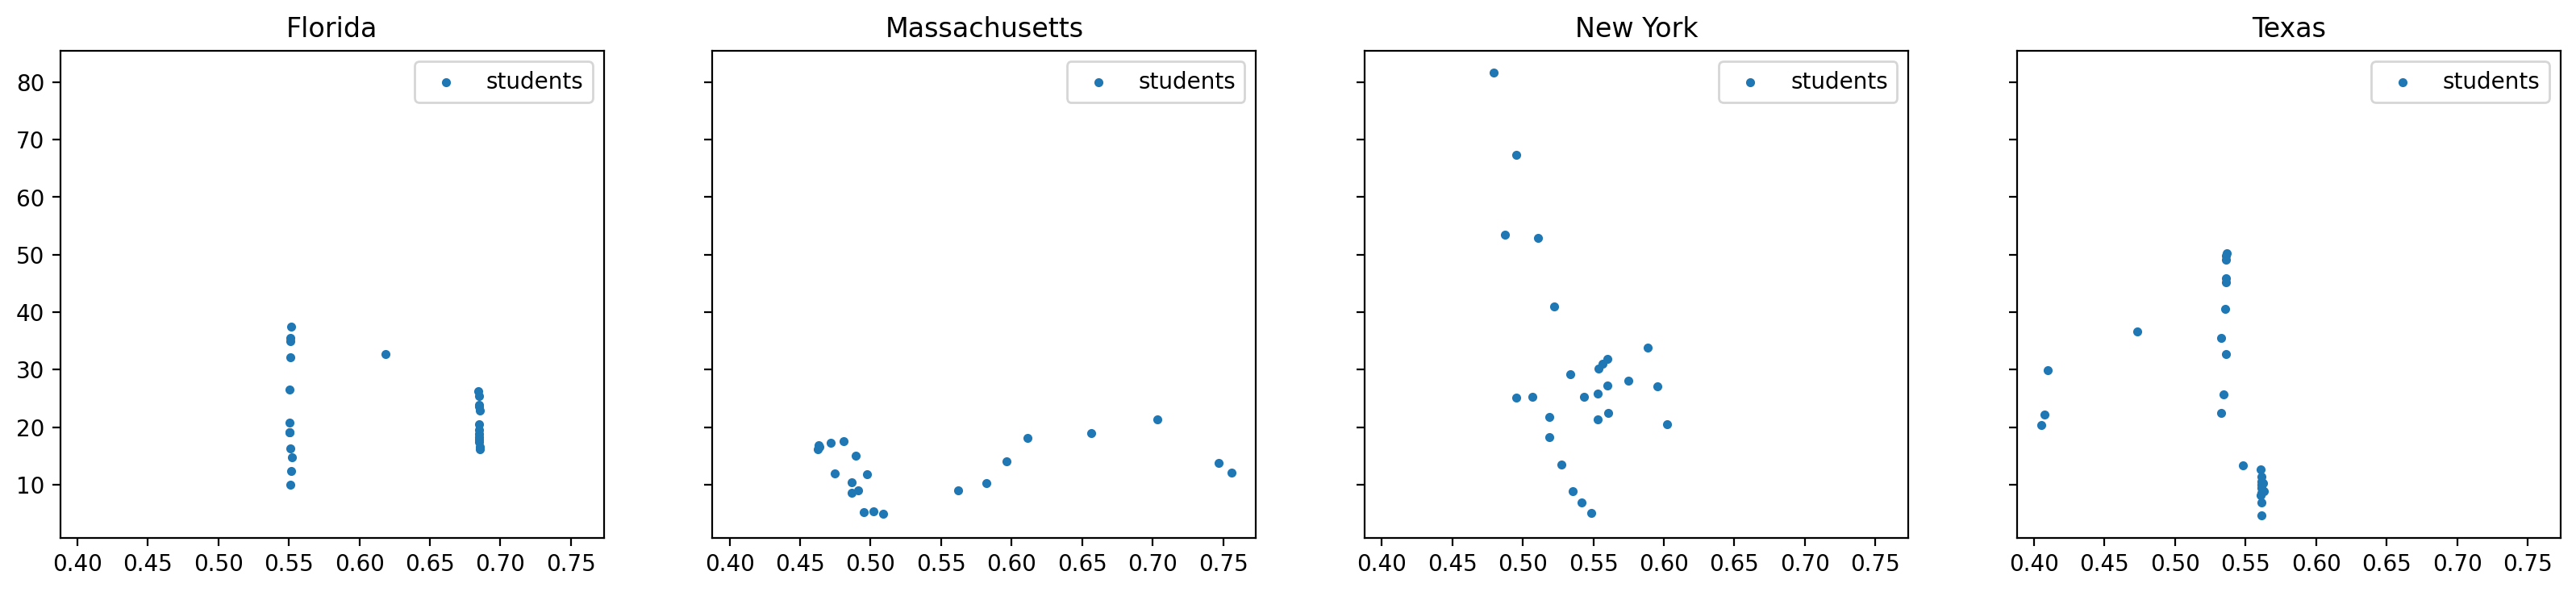

In [199]:
wid = 2
fig, ax = plt.subplots(1,4,figsize=(20,4),dpi=200,sharey=True,sharex=True)
for i,st in enumerate(df.state.unique()):
    st_df = df.loc[df['state']==st].copy()
    st_df.loc[st_df['new_cases_students']==0,'new_cases_students'] = np.nan
    st_df.loc[st_df['new_cases_employee']==0,'new_cases_employee'] = np.nan
    st_df = st_df.loc[st_df['date']>'2020-10-11'].copy()

    st_df['new_cases_students_per100k'] = st_df['new_cases_students'] / st_df['num_students_est'] * 100000 / 7
    st_df['new_cases_employee_per100k'] = st_df['new_cases_employee'] / st_df['num_staff_est'] * 100000 / 7
    st_df['new_cases_state_per100k'] = st_df['new_cases_state'] / st_df['population_state'] * 100000 / 7
    rfa = st_df['new_cases_students_per100k'].rolling(window=wid).mean()
    rfa = rfa / st_df['new_cases_state_per100k'].rolling(window=wid).mean()
    rfa = st_df['new_cases_students_per100k'].rolling(window=wid).mean()
#     rfa = st_df['new_cases_students_per100k'].pct_change().rolling(window=wid).mean()
    xfa = st_df['num_students_est'].rolling(window=wid).mean()/st_df['tot_students'].rolling(window=wid).mean()
    ax[i].scatter(xfa, rfa, label='students', marker='.')
#     ax[i].plot([date_dict[i] for i in st_df['date']], st_df['new_cases_employee_per100k'].rolling(window=3).mean(),
#                label='employees', marker='|')
#     ax[i].plot([date_dict[i] for i in st_df['date']], st_df['new_cases_state_per100k'].rolling(window=3).mean(),
#                label='statewide', marker='.')
    ax[i].set_title(st)
    
    ax[i].legend()
#     ax[i].set_xlim(date_dict['2020-10-05'])


plt.show()

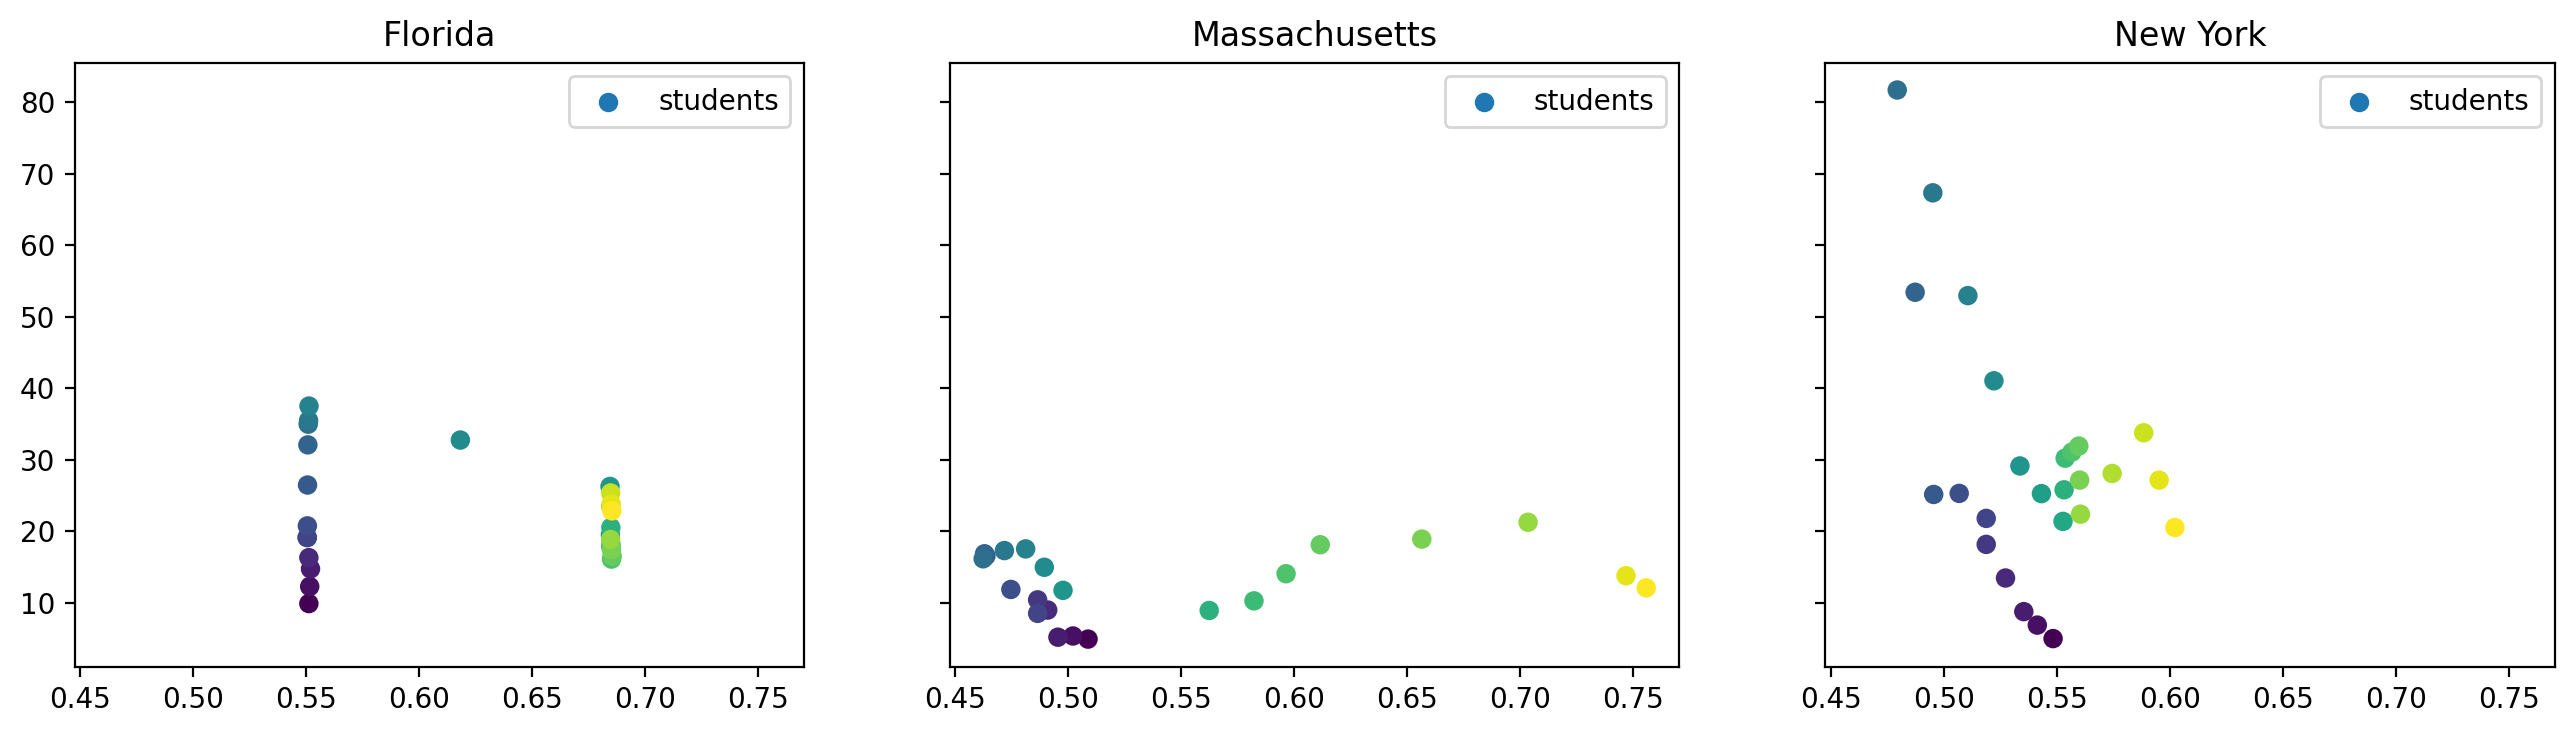

In [200]:
wid = 2
fig, ax = plt.subplots(1,3,figsize=(16,4),dpi=200,sharey=True,sharex=True)
for i,st in enumerate(['New York','Massachusetts','Florida'][::-1]):
    st_df = df.loc[df['state']==st].copy()
    st_df.loc[st_df['new_cases_students']==0,'new_cases_students'] = np.nan
    st_df.loc[st_df['new_cases_employee']==0,'new_cases_employee'] = np.nan
    st_df = st_df.loc[st_df['date']>'2020-10-10'].copy()
    st_df['new_cases_students_per100k'] = st_df['new_cases_students'] / st_df['num_students_est'] * 100000 / 7
    st_df['new_cases_employee_per100k'] = st_df['new_cases_employee'] / st_df['num_staff_est'] * 100000 / 7
    st_df['new_cases_state_per100k'] = st_df['new_cases_state'] / st_df['population_state'] * 100000 / 7
    rfa = st_df['new_cases_students_per100k'].rolling(window=wid).mean()
#     rfa = rfa / st_df['new_cases_state_per100k'].rolling(window=wid).mean()
    xfa = st_df['num_students_est'].rolling(window=wid).mean()/st_df['tot_students'].rolling(window=wid).mean()
    ax[i].scatter(xfa, rfa, label='students', marker='o', c=np.linspace(0,0.9,len(xfa)))
#     ax[i].plot([date_dict[i] for i in st_df['date']], st_df['new_cases_employee_per100k'].rolling(window=3).mean(),
#                label='employees', marker='|')
#     ax[i].plot([date_dict[i] for i in st_df['date']], st_df['new_cases_state_per100k'].rolling(window=3).mean(),
#                label='statewide', marker='.')
    ax[i].set_title(st)
    
    ax[i].legend()
#     ax[i].set_xlim(date_dict['2020-10-05'])


plt.show()

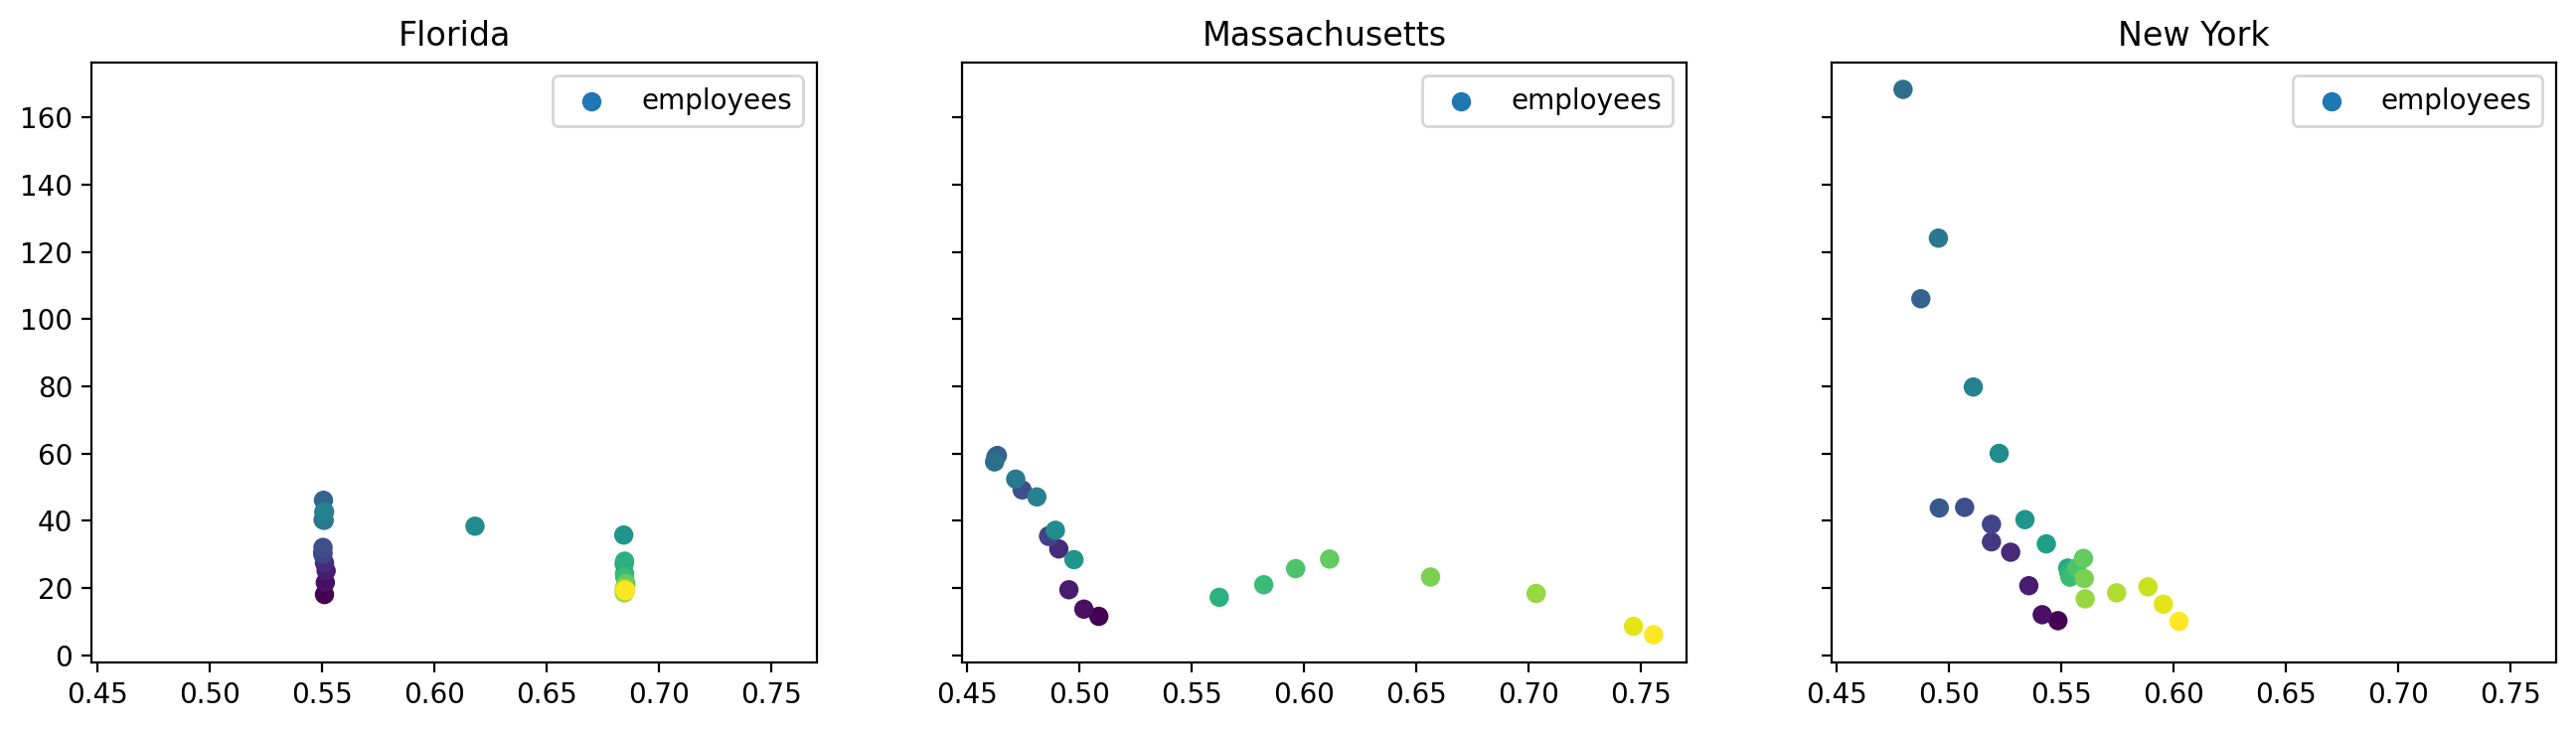

In [201]:
wid = 2
fig, ax = plt.subplots(1,3,figsize=(16,4),dpi=200,sharey=True,sharex=True)
for i,st in enumerate(['New York','Massachusetts','Florida'][::-1]):
    st_df = df.loc[df['state']==st].copy()
    st_df.loc[st_df['new_cases_students']==0,'new_cases_students'] = np.nan
    st_df.loc[st_df['new_cases_employee']==0,'new_cases_employee'] = np.nan
    st_df = st_df.loc[st_df['date']>'2020-10-10'].copy()
    st_df['new_cases_students_per100k'] = st_df['new_cases_students'] / st_df['num_students_est'] * 100000 / 7
    st_df['new_cases_employee_per100k'] = st_df['new_cases_employee'] / st_df['num_staff_est'] * 100000 / 7
    st_df['new_cases_state_per100k'] = st_df['new_cases_state'] / st_df['population_state'] * 100000 / 7
    rfa = st_df['new_cases_employee_per100k'].rolling(window=wid).mean()
#     rfa = rfa / st_df['new_cases_state_per100k'].rolling(window=wid).mean()
    xfa = st_df['num_students_est'].rolling(window=wid).mean()/st_df['tot_students'].rolling(window=wid).mean()
    ax[i].scatter(xfa, rfa, label='employees', marker='o', c=np.linspace(0,0.9,len(xfa)))
#     ax[i].plot([date_dict[i] for i in st_df['date']], st_df['new_cases_employee_per100k'].rolling(window=3).mean(),
#                label='employees', marker='|')
#     ax[i].plot([date_dict[i] for i in st_df['date']], st_df['new_cases_state_per100k'].rolling(window=3).mean(),
#                label='statewide', marker='.')
    ax[i].set_title(st)
    
    ax[i].legend()
#     ax[i].set_xlim(date_dict['2020-10-05'])


plt.show()

Florida 0.0211
Massachusetts 0.0187
New York 0.0001


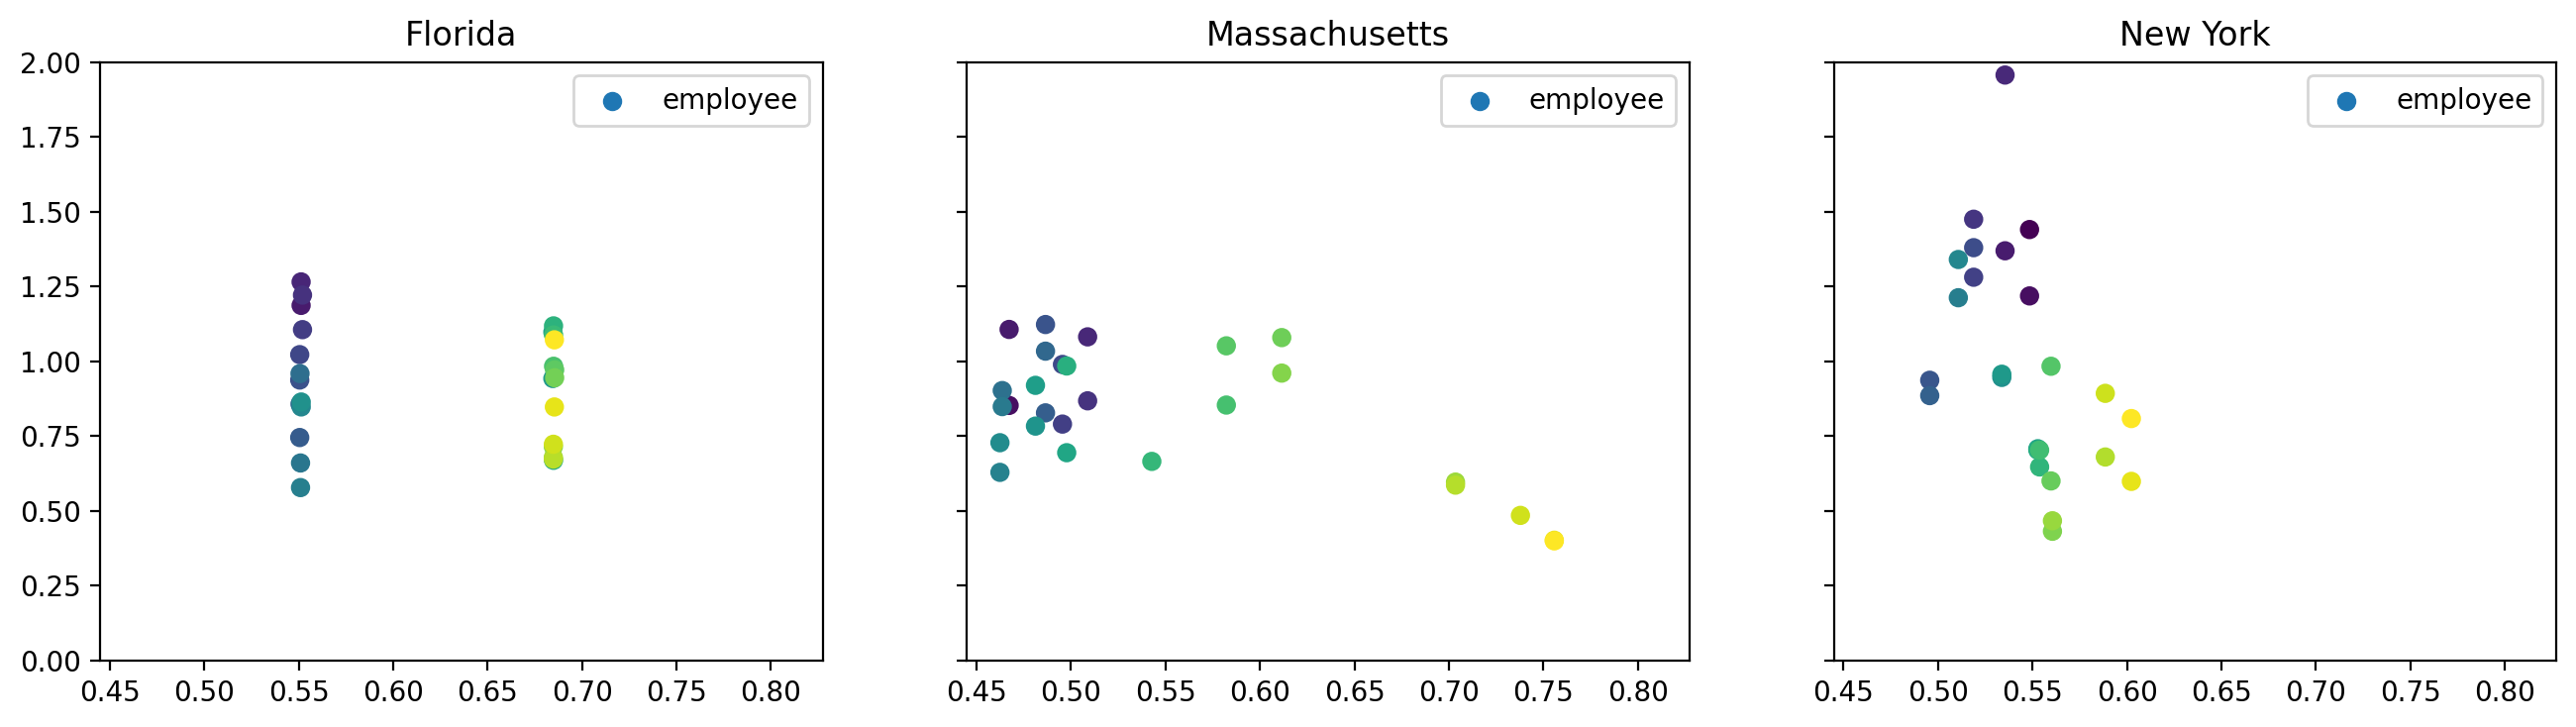

In [217]:
wid = 1
fig, ax = plt.subplots(1,3,figsize=(16,4),dpi=200,sharey=True,sharex=True)
for i,st in enumerate(['New York','Massachusetts','Florida'][::-1]):
    st_df = df.loc[df['state']==st].copy()
    st_df.loc[st_df['new_cases_employee']==0,'new_cases_employee'] = np.nan
    st_df.loc[st_df['new_cases_students']==0,'new_cases_students'] = np.nan
    st_df = st_df.loc[~st_df['new_cases_students'].isna()].copy()
#     st_df.loc[st_df['new_cases_employee']==0,'new_cases_employee'] = np.nan
    st_df = st_df.loc[st_df['date']>'2020-09-01'].copy()
    st_df['new_cases_students_per100k'] = st_df['new_cases_students'] / st_df['num_students_est'] * 100000 / 7
    st_df['new_cases_employee_per100k'] = st_df['new_cases_employee'] / st_df['num_staff_est'] * 100000 / 7
    st_df['new_cases_state_per100k'] = st_df['new_cases_state'] / st_df['population_state'] * 100000 / 7
    rfa = st_df['new_cases_employee_per100k'].rolling(window=wid).mean()
    rfa = rfa / st_df['new_cases_state_per100k'].rolling(window=wid).mean()
    xfa = st_df['num_students_est'].rolling(window=wid).mean()/st_df['tot_students'].rolling(window=wid).mean()
    ax[i].scatter(xfa, rfa, label='employee', marker='o', c=np.linspace(0,0.9,len(xfa)))
#     ax[i].plot([date_dict[i] for i in st_df['date']], st_df['new_cases_employee_per100k'].rolling(window=3).mean(),
#                label='employees', marker='|')
#     ax[i].plot([date_dict[i] for i in st_df['date']], st_df['new_cases_state_per100k'].rolling(window=3).mean(),
#                label='statewide', marker='.')
    ax[i].set_title(st)
    sli, ini, rvi, pvi, sti = linregress(xfa.values,rfa.values)
    print(st,np.round(pvi,4))
    
    ax[i].legend()
    ax[i].set_ylim(0,2)


plt.show()

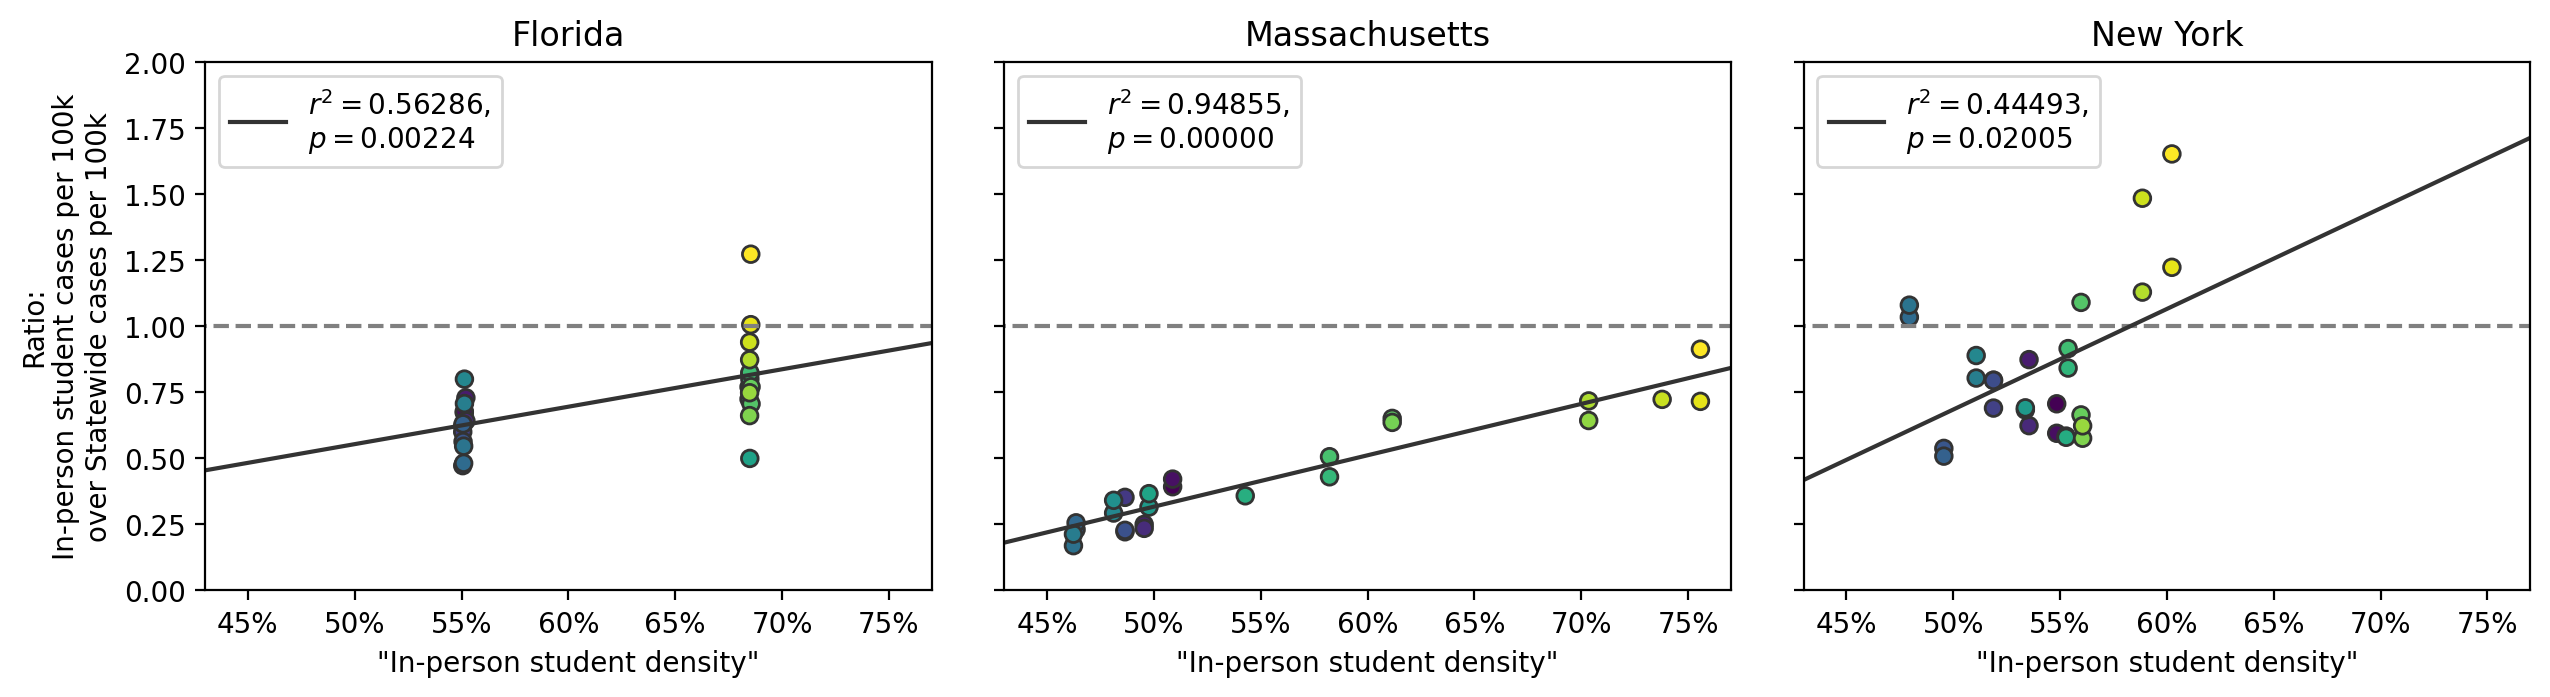

In [267]:
wid = 1
fig, ax = plt.subplots(1,3,figsize=(15,3.5),dpi=200,sharey=True,sharex=True)
plt.subplots_adjust(wspace=0.1)

for i,st in enumerate(['New York','Massachusetts','Florida'][::-1]):
    st_df = df.loc[df['state']==st].copy()
    st_df.loc[st_df['new_cases_employee']==0,'new_cases_employee'] = np.nan
    st_df.loc[st_df['new_cases_students']==0,'new_cases_students'] = np.nan
    st_df = st_df.loc[~st_df['new_cases_students'].isna()].copy()
    st_df = st_df.loc[st_df['date']>'2020-10-09'].copy()
    if st == 'Florida':
        st_df = st_df.loc[st_df['date']>'2020-10-10'].copy()
    st_df['new_cases_students_per100k'] = st_df['new_cases_students'] / st_df['num_students_est'] * 100000 / 7
    st_df['new_cases_employee_per100k'] = st_df['new_cases_employee'] / st_df['num_staff_est'] * 100000 / 7
    st_df['new_cases_state_per100k'] = st_df['new_cases_state'] / st_df['population_state'] * 100000 / 7
    rfa = st_df['new_cases_students_per100k'].rolling(window=wid).mean()
    rfa = rfa / st_df['new_cases_state_per100k'].rolling(window=wid).mean()
    xfa = st_df['num_students_est'].rolling(window=wid).mean()/st_df['tot_students'].rolling(window=wid).mean()
    sli, ini, rvi, pvi, sti = linregress(xfa.values,rfa.values)
    
    ax[i].hlines(1,0,1,color='.5',ls='--')
    ax[i].plot([0,1], [ini, sli+ini], label=r'$r^2=%.5f$,'%(rvi)+'\n'+'$p=%.5f$'%(pvi),color='.2')

    ax[i].scatter(xfa.values, rfa.values, marker='o',ec='.2',c=np.linspace(0,0.9,len(xfa)))#, label='students'
    ax[i].set_title(st)
    
    ax[i].legend(loc=2)
    ax[i].set_ylim(0,2)
    ax[i].set_xlim(0.43,0.77)
    ax[i].xaxis.set_major_formatter(mtick.PercentFormatter(1.0,decimals=0))
    ax[i].set_xlabel('"In-person student density"')

ax[0].set_ylabel('Ratio:\nIn-person student cases per 100k\nover Statewide cases per 100k')

plt.savefig('../figs/pngs/inperson_statewide_ratio_oster.png',dpi=425,bbox_inches='tight')
plt.show()

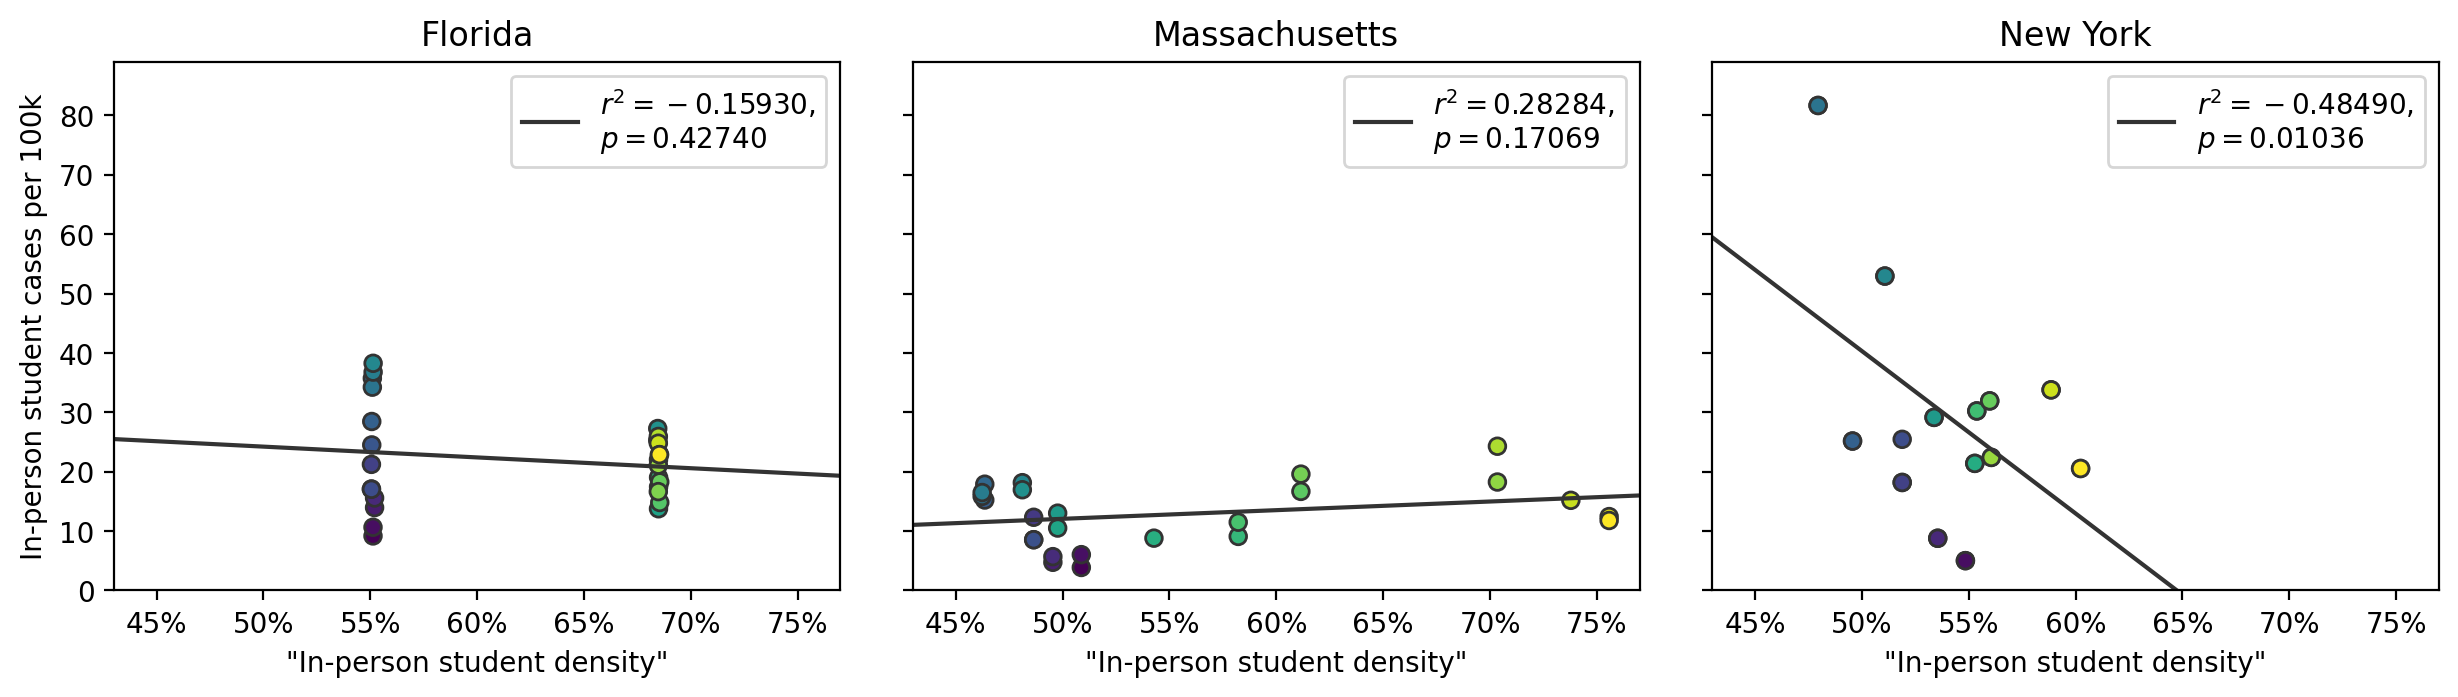

In [268]:
wid = 1
fig, ax = plt.subplots(1,3,figsize=(15,3.5),dpi=200,sharey=True,sharex=True)
plt.subplots_adjust(wspace=0.1)

for i,st in enumerate(['New York','Massachusetts','Florida'][::-1]):
    st_df = df.loc[df['state']==st].copy()
    st_df.loc[st_df['new_cases_employee']==0,'new_cases_employee'] = np.nan
    st_df.loc[st_df['new_cases_students']==0,'new_cases_students'] = np.nan
    st_df = st_df.loc[~st_df['new_cases_students'].isna()].copy()
    st_df = st_df.loc[st_df['date']>'2020-10-09'].copy()
    if st == 'Florida':
        st_df = st_df.loc[st_df['date']>'2020-10-10'].copy()
    st_df['new_cases_students_per100k'] = st_df['new_cases_students'] / st_df['num_students_est'] * 100000 / 7
    st_df['new_cases_employee_per100k'] = st_df['new_cases_employee'] / st_df['num_staff_est'] * 100000 / 7
    st_df['new_cases_state_per100k'] = st_df['new_cases_state'] / st_df['population_state'] * 100000 / 7
    rfa = st_df['new_cases_students_per100k'].rolling(window=wid).mean()
#     rfa = rfa / st_df['new_cases_state_per100k'].rolling(window=wid).mean()
    xfa = st_df['num_students_est'].rolling(window=wid).mean()/st_df['tot_students'].rolling(window=wid).mean()
    sli, ini, rvi, pvi, sti = linregress(xfa.values,rfa.values)

    ax[i].scatter(xfa.values, rfa.values, marker='o', c=np.linspace(0,0.9,len(xfa)), ec='.2')#, label='students'

    ax[i].set_title(st)
    ax[i].plot([0,1], [ini, sli+ini], label=r'$r^2=%.5f$,'%(rvi)+'\n'+'$p=%.5f$'%(pvi),color='.2')

    ax[i].legend(loc=1)
    ax[i].set_ylim(0,89)
    ax[i].set_xlim(0.43,0.77)
    ax[i].xaxis.set_major_formatter(mtick.PercentFormatter(1.0,decimals=0))
    ax[i].set_xlabel('"In-person student density"')

ax[0].set_ylabel('In-person student cases per 100k')

plt.savefig('../figs/pngs/inperson_statewide_cases_oster.png',dpi=425,bbox_inches='tight')
plt.show()

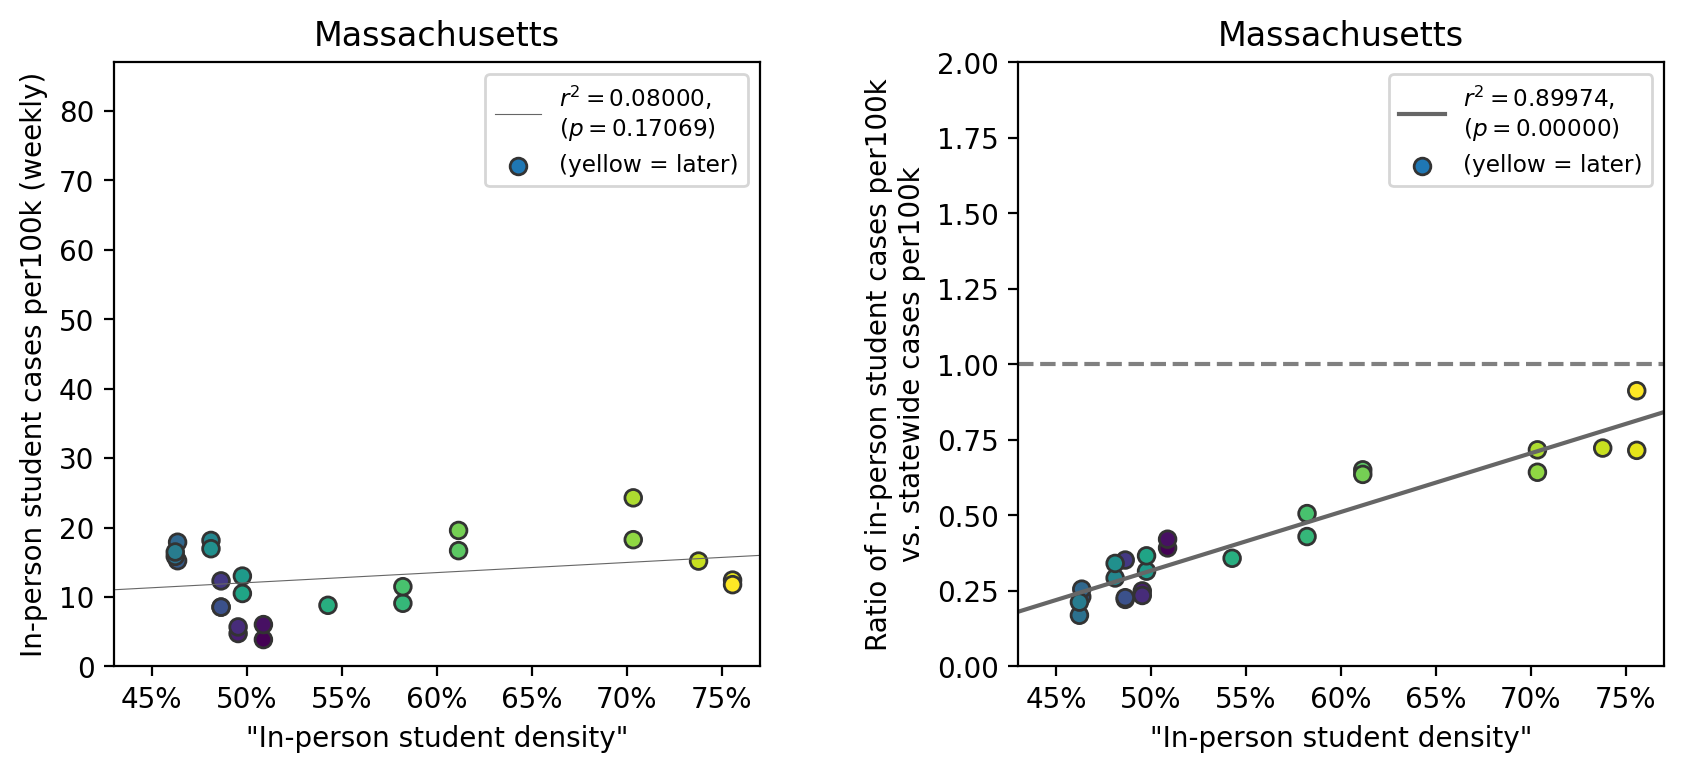

In [325]:
wid = 1
fig, ax = plt.subplots(1,2,figsize=(10,4),dpi=200)
plt.subplots_adjust(wspace=0.4)

for i,st in enumerate(['Massachusetts'][::-1]):
    st_df = df.loc[df['state']==st].copy()
    st_df.loc[st_df['new_cases_employee']==0,'new_cases_employee'] = np.nan
    st_df.loc[st_df['new_cases_students']==0,'new_cases_students'] = np.nan
    st_df = st_df.loc[~st_df['new_cases_students'].isna()].copy()
    st_df = st_df.loc[st_df['date']>'2020-10-09'].copy()
    if st == 'Florida':
        st_df = st_df.loc[st_df['date']>'2020-10-10'].copy()
    st_df['new_cases_students_per100k'] = st_df['new_cases_students'] / st_df['num_students_est'] * 100000 / 7
    st_df['new_cases_employee_per100k'] = st_df['new_cases_employee'] / st_df['num_staff_est'] * 100000 / 7
    st_df['new_cases_state_per100k'] = st_df['new_cases_state'] / st_df['population_state'] * 100000 / 7
    rfa = st_df['new_cases_students_per100k'].rolling(window=wid).mean()
#     rfa = rfa / st_df['new_cases_state_per100k'].rolling(window=wid).mean()
    xfa = st_df['num_students_est'].rolling(window=wid).mean()/st_df['tot_students'].rolling(window=wid).mean()
    sli, ini, rvi, pvi, sti = linregress(xfa.values,rfa.values)
    
#     ax[1].hlines(1,0,1,color='.5',ls='--')
    ax[0].plot([0,1], [ini, sli+ini], label=r'$r^2=%.5f$,'%(rvi**2)+'\n'+'$(p=%.5f)$'%(pvi),color='.4',lw=0.4)
    ax[0].scatter(xfa.values, rfa.values, marker='o',ec='.2',c=np.linspace(0,0.9,len(xfa)),label='(yellow = later)')
    ax[0].set_title(st)
    ax[0].legend(loc=1,fontsize='small')
    ax[0].set_ylim(0,87)
    ax[0].set_xlim(0.43,0.77)
    ax[0].xaxis.set_major_formatter(mtick.PercentFormatter(1.0,decimals=0))
    ax[0].set_xlabel('"In-person student density"')
    ax[0].set_ylabel('In-person student cases per100k (weekly)')

    
    st_df = df.loc[df['state']==st].copy()
    st_df.loc[st_df['new_cases_employee']==0,'new_cases_employee'] = np.nan
    st_df.loc[st_df['new_cases_students']==0,'new_cases_students'] = np.nan
    st_df = st_df.loc[~st_df['new_cases_students'].isna()].copy()
    st_df = st_df.loc[st_df['date']>'2020-10-09'].copy()
    if st == 'Florida':
        st_df = st_df.loc[st_df['date']>'2020-10-10'].copy()
    st_df['new_cases_students_per100k'] = st_df['new_cases_students'] / st_df['num_students_est'] * 100000 / 7
    st_df['new_cases_employee_per100k'] = st_df['new_cases_employee'] / st_df['num_staff_est'] * 100000 / 7
    st_df['new_cases_state_per100k'] = st_df['new_cases_state'] / st_df['population_state'] * 100000 / 7
    rfa = st_df['new_cases_students_per100k'].rolling(window=wid).mean()
    rfa = rfa / st_df['new_cases_state_per100k'].rolling(window=wid).mean()
    xfa = st_df['num_students_est'].rolling(window=wid).mean()/st_df['tot_students'].rolling(window=wid).mean()
    sli, ini, rvi, pvi, sti = linregress(xfa.values,rfa.values)
    
    ax[1].hlines(1,0,1,color='.5',ls='--')
    ax[1].plot([0,1], [ini, sli+ini], label=r'$r^2=%.5f$,'%(rvi**2)+'\n'+'$(p=%.5f)$'%(pvi),color='.4')
    ax[1].scatter(xfa.values, rfa.values, marker='o',ec='.2',c=np.linspace(0,0.9,len(xfa)),label='(yellow = later)')
    ax[1].set_title(st)
    ax[1].legend(loc=1,fontsize='small')
    ax[1].set_ylim(0,2)
    ax[1].set_xlim(0.43,0.77)
    ax[1].xaxis.set_major_formatter(mtick.PercentFormatter(1.0,decimals=0))
    ax[1].set_xlabel('"In-person student density"')
    ax[1].set_ylabel('Ratio of in-person student cases per100k\nvs. statewide cases per100k')

plt.savefig('../figs/pngs/inperson_statewide_massachusetts_oster2.png',dpi=425,bbox_inches='tight')
plt.show()

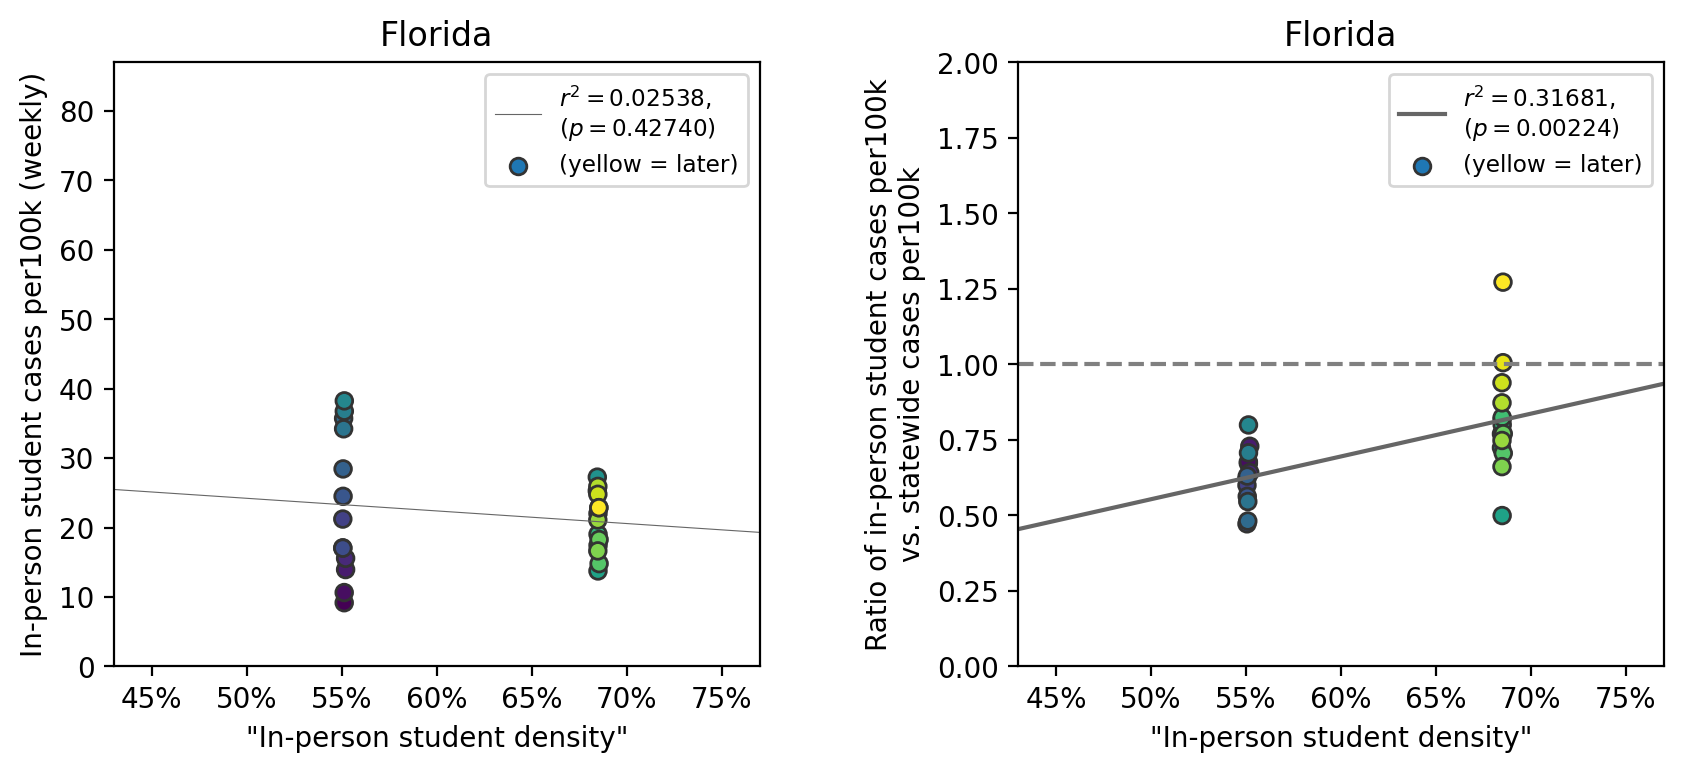

In [326]:
wid = 1
fig, ax = plt.subplots(1,2,figsize=(10,4),dpi=200)
plt.subplots_adjust(wspace=0.4)

for i,st in enumerate(['Florida'][::-1]):
    st_df = df.loc[df['state']==st].copy()
    st_df.loc[st_df['new_cases_employee']==0,'new_cases_employee'] = np.nan
    st_df.loc[st_df['new_cases_students']==0,'new_cases_students'] = np.nan
    st_df = st_df.loc[~st_df['new_cases_students'].isna()].copy()
    st_df = st_df.loc[st_df['date']>'2020-10-09'].copy()
    if st == 'Florida':
        st_df = st_df.loc[st_df['date']>'2020-10-10'].copy()
    st_df['new_cases_students_per100k'] = st_df['new_cases_students'] / st_df['num_students_est'] * 100000 / 7
    st_df['new_cases_employee_per100k'] = st_df['new_cases_employee'] / st_df['num_staff_est'] * 100000 / 7
    st_df['new_cases_state_per100k'] = st_df['new_cases_state'] / st_df['population_state'] * 100000 / 7
    rfa = st_df['new_cases_students_per100k'].rolling(window=wid).mean()
#     rfa = rfa / st_df['new_cases_state_per100k'].rolling(window=wid).mean()
    xfa = st_df['num_students_est'].rolling(window=wid).mean()/st_df['tot_students'].rolling(window=wid).mean()
    sli, ini, rvi, pvi, sti = linregress(xfa.values,rfa.values)
    
#     ax[1].hlines(1,0,1,color='.5',ls='--')
    ax[0].plot([0,1], [ini, sli+ini], label=r'$r^2=%.5f$,'%(rvi**2)+'\n'+'$(p=%.5f)$'%(pvi),color='.4',lw=0.4)
    ax[0].scatter(xfa.values, rfa.values, marker='o',ec='.2',c=np.linspace(0,0.9,len(xfa)),label='(yellow = later)')
    ax[0].set_title(st)
    ax[0].legend(loc=1,fontsize='small')
    ax[0].set_ylim(0,87)
    ax[0].set_xlim(0.43,0.77)
    ax[0].xaxis.set_major_formatter(mtick.PercentFormatter(1.0,decimals=0))
    ax[0].set_xlabel('"In-person student density"')
    ax[0].set_ylabel('In-person student cases per100k (weekly)')

    
    st_df = df.loc[df['state']==st].copy()
    st_df.loc[st_df['new_cases_employee']==0,'new_cases_employee'] = np.nan
    st_df.loc[st_df['new_cases_students']==0,'new_cases_students'] = np.nan
    st_df = st_df.loc[~st_df['new_cases_students'].isna()].copy()
    st_df = st_df.loc[st_df['date']>'2020-10-09'].copy()
    if st == 'Florida':
        st_df = st_df.loc[st_df['date']>'2020-10-10'].copy()
    st_df['new_cases_students_per100k'] = st_df['new_cases_students'] / st_df['num_students_est'] * 100000 / 7
    st_df['new_cases_employee_per100k'] = st_df['new_cases_employee'] / st_df['num_staff_est'] * 100000 / 7
    st_df['new_cases_state_per100k'] = st_df['new_cases_state'] / st_df['population_state'] * 100000 / 7
    rfa = st_df['new_cases_students_per100k'].rolling(window=wid).mean()
    rfa = rfa / st_df['new_cases_state_per100k'].rolling(window=wid).mean()
    xfa = st_df['num_students_est'].rolling(window=wid).mean()/st_df['tot_students'].rolling(window=wid).mean()
    sli, ini, rvi, pvi, sti = linregress(xfa.values,rfa.values)
    
    ax[1].hlines(1,0,1,color='.5',ls='--')
    ax[1].plot([0,1], [ini, sli+ini], label=r'$r^2=%.5f$,'%(rvi**2)+'\n'+'$(p=%.5f)$'%(pvi),color='.4')
    ax[1].scatter(xfa.values, rfa.values, marker='o',ec='.2',c=np.linspace(0,0.9,len(xfa)),label='(yellow = later)')
    ax[1].set_title(st)
    ax[1].legend(loc=1,fontsize='small')
    ax[1].set_ylim(0,2)
    ax[1].set_xlim(0.43,0.77)
    ax[1].xaxis.set_major_formatter(mtick.PercentFormatter(1.0,decimals=0))
    ax[1].set_xlabel('"In-person student density"')
    ax[1].set_ylabel('Ratio of in-person student cases per100k\nvs. statewide cases per100k')

plt.savefig('../figs/pngs/inperson_statewide_florida_oster2.png',dpi=425,bbox_inches='tight')
plt.show()

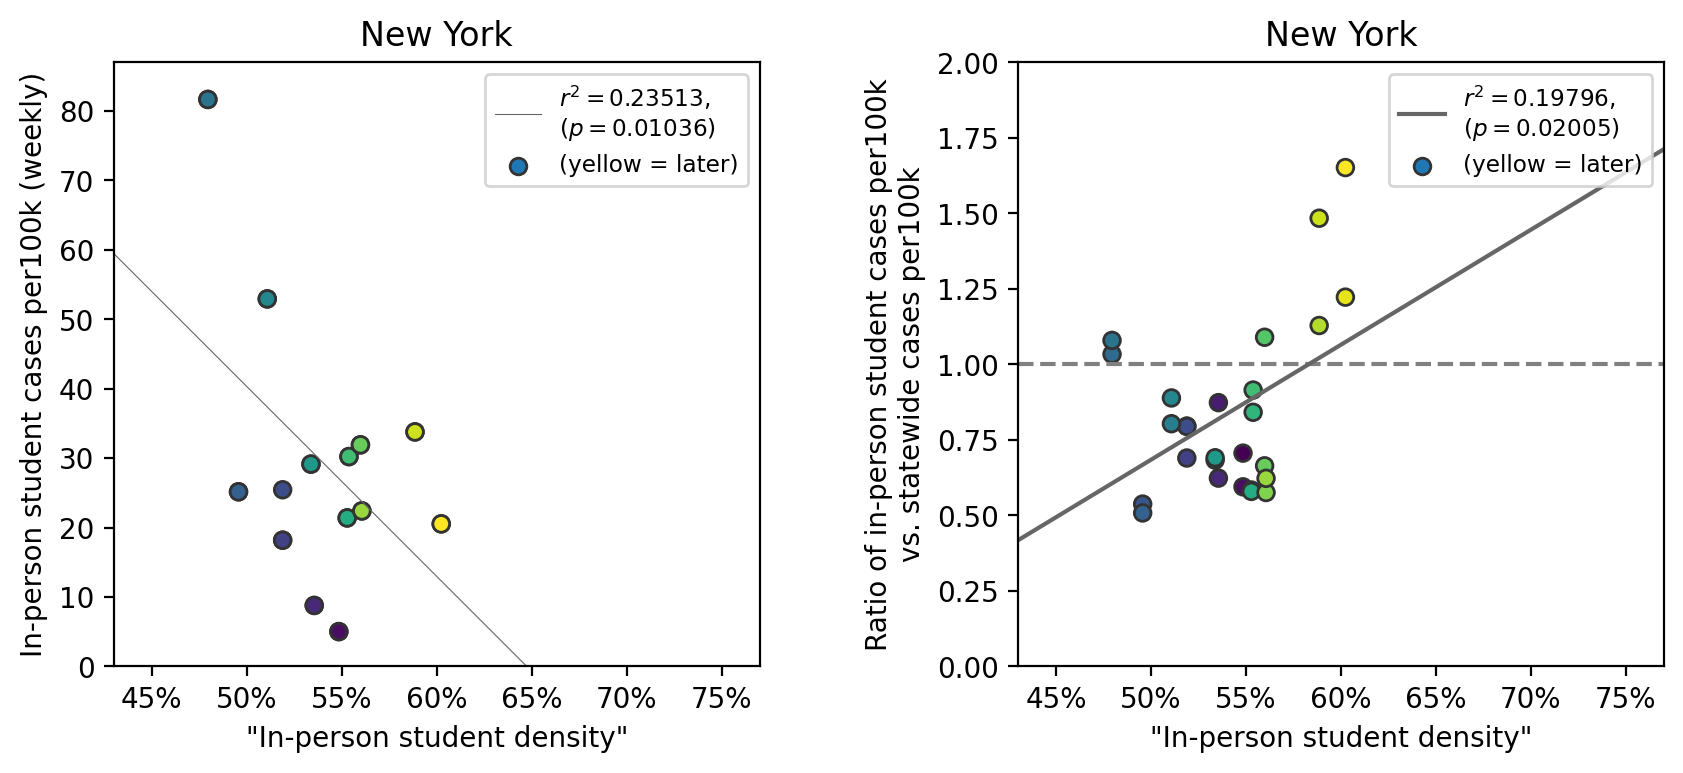

In [327]:
wid = 1
fig, ax = plt.subplots(1,2,figsize=(10,4),dpi=200)
plt.subplots_adjust(wspace=0.4)

for i,st in enumerate(['New York'][::-1]):
    st_df = df.loc[df['state']==st].copy()
    st_df.loc[st_df['new_cases_employee']==0,'new_cases_employee'] = np.nan
    st_df.loc[st_df['new_cases_students']==0,'new_cases_students'] = np.nan
    st_df = st_df.loc[~st_df['new_cases_students'].isna()].copy()
    st_df = st_df.loc[st_df['date']>'2020-10-09'].copy()
    if st == 'Florida':
        st_df = st_df.loc[st_df['date']>'2020-10-10'].copy()
    st_df['new_cases_students_per100k'] = st_df['new_cases_students'] / st_df['num_students_est'] * 100000 / 7
    st_df['new_cases_employee_per100k'] = st_df['new_cases_employee'] / st_df['num_staff_est'] * 100000 / 7
    st_df['new_cases_state_per100k'] = st_df['new_cases_state'] / st_df['population_state'] * 100000 / 7
    rfa = st_df['new_cases_students_per100k'].rolling(window=wid).mean()
#     rfa = rfa / st_df['new_cases_state_per100k'].rolling(window=wid).mean()
    xfa = st_df['num_students_est'].rolling(window=wid).mean()/st_df['tot_students'].rolling(window=wid).mean()
    sli, ini, rvi, pvi, sti = linregress(xfa.values,rfa.values)
    
#     ax[1].hlines(1,0,1,color='.5',ls='--')
    ax[0].plot([0,1], [ini, sli+ini], label=r'$r^2=%.5f$,'%(rvi**2)+'\n'+'$(p=%.5f)$'%(pvi),color='.4',lw=0.4)
    ax[0].scatter(xfa.values, rfa.values, marker='o',ec='.2',c=np.linspace(0,0.9,len(xfa)),label='(yellow = later)')
    ax[0].set_title(st)
    ax[0].legend(loc=1,fontsize='small')
    ax[0].set_ylim(0,87)
    ax[0].set_xlim(0.43,0.77)
    ax[0].xaxis.set_major_formatter(mtick.PercentFormatter(1.0,decimals=0))
    ax[0].set_xlabel('"In-person student density"')
    ax[0].set_ylabel('In-person student cases per100k (weekly)')

    
    st_df = df.loc[df['state']==st].copy()
    st_df.loc[st_df['new_cases_employee']==0,'new_cases_employee'] = np.nan
    st_df.loc[st_df['new_cases_students']==0,'new_cases_students'] = np.nan
    st_df = st_df.loc[~st_df['new_cases_students'].isna()].copy()
    st_df = st_df.loc[st_df['date']>'2020-10-09'].copy()
    if st == 'Florida':
        st_df = st_df.loc[st_df['date']>'2020-10-10'].copy()
    st_df['new_cases_students_per100k'] = st_df['new_cases_students'] / st_df['num_students_est'] * 100000 / 7
    st_df['new_cases_employee_per100k'] = st_df['new_cases_employee'] / st_df['num_staff_est'] * 100000 / 7
    st_df['new_cases_state_per100k'] = st_df['new_cases_state'] / st_df['population_state'] * 100000 / 7
    rfa = st_df['new_cases_students_per100k'].rolling(window=wid).mean()
    rfa = rfa / st_df['new_cases_state_per100k'].rolling(window=wid).mean()
    xfa = st_df['num_students_est'].rolling(window=wid).mean()/st_df['tot_students'].rolling(window=wid).mean()
    sli, ini, rvi, pvi, sti = linregress(xfa.values,rfa.values)
    
    ax[1].hlines(1,0,1,color='.5',ls='--')
    ax[1].plot([0,1], [ini, sli+ini], label=r'$r^2=%.5f$,'%(rvi**2)+'\n'+'$(p=%.5f)$'%(pvi),color='.4')
    ax[1].scatter(xfa.values, rfa.values, marker='o',ec='.2',c=np.linspace(0,0.9,len(xfa)),label='(yellow = later)')
    ax[1].set_title(st)
    ax[1].legend(loc=1,fontsize='small')
    ax[1].set_ylim(0,2.0)
    ax[1].set_xlim(0.43,0.77)
    ax[1].xaxis.set_major_formatter(mtick.PercentFormatter(1.0,decimals=0))
    ax[1].set_xlabel('"In-person student density"')
    ax[1].set_ylabel('Ratio of in-person student cases per100k\nvs. statewide cases per100k')

plt.savefig('../figs/pngs/inperson_statewide_newyork_oster2.png',dpi=425,bbox_inches='tight')
plt.show()

In [347]:
url_st_hosp = 'https://healthdata.gov/api/views/g62h-syeh/rows.csv?accessType=DOWNLOAD'
hosp_st = pd.read_csv(url_st_hosp)
hosp_st['date'] = pd.to_datetime(hosp_st['date']).astype(str)
hosp_st = hosp_st.loc[hosp_st['date']>'2020-07-15'].copy()
hosp_st = hosp_st.sort_values(['state','date']).reset_index().iloc[:,1:]

all_prev_cols = ['previous_day_admission_adult_covid_confirmed',
                 'previous_day_admission_adult_covid_suspected',
                 'previous_day_admission_pediatric_covid_confirmed',
                 'previous_day_admission_pediatric_covid_suspected']
adult_prev_cols = ['previous_day_admission_adult_covid_confirmed',
                   'previous_day_admission_adult_covid_suspected']
child_prev_cols = ['previous_day_admission_pediatric_covid_confirmed',
                   'previous_day_admission_pediatric_covid_suspected']
adult_total_cols = 'total_adult_patients_hospitalized_confirmed_and_suspected_covid'
child_total_cols = 'total_pediatric_patients_hospitalized_confirmed_and_suspected_covid'
total_cols = ['total_adult_patients_hospitalized_confirmed_and_suspected_covid',
              'total_pediatric_patients_hospitalized_confirmed_and_suspected_covid']

hosp_st['previous_day_admission_confirmed_and_suspected'] = hosp_st[all_prev_cols].sum(axis=1)
hosp_st['total_patients_confirmed_and_suspected_covid'] = hosp_st[total_cols].sum(axis=1)
hosp_st['previous_day_pediatric_admission_confirmed_and_suspected'] = hosp_st[child_prev_cols].sum(axis=1)
hosp_st['previous_day_adult_admission_confirmed_and_suspected'] = hosp_st[adult_prev_cols].sum(axis=1)
ny_hosp = hosp_st.loc[hosp_st['state']=='NY'].copy()
ny_hosp = ny_hosp.loc[ny_hosp['date']>'2020-09-01'].copy()

ny_hospg = ny_hosp.merge(DATE_DF[['date','week']]).groupby('week').agg({child_total_cols:'max',
                                                             'date':'max'}).reset_index()
ny_hospg[child_total_cols] = ny_hospg[child_total_cols].astype(int)
ny_hospg.loc[ny_hospg['date']=='2020-12-20',child_total_cols] = 140
ny_dfg = ny_dfg.merge(tmp_df[['state','num_students_est','week']],how='left',on=['state','week'])

KeyError: 'num_students_est'

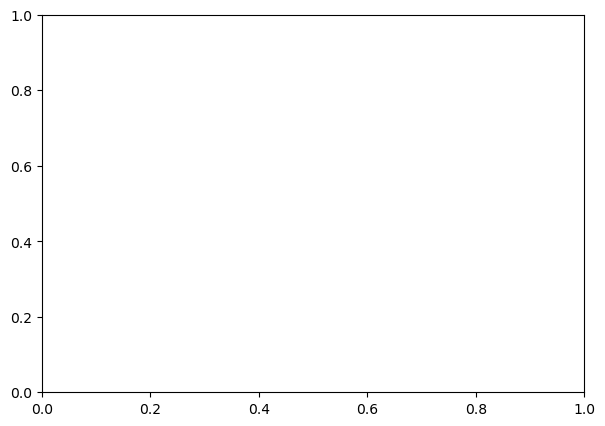

In [348]:
fig, ax = plt.subplots(1,1,figsize=(7,5),dpi=100)

ax.plot([date_dict[i] for i in ny_dfg['date']],
         (ny_dfg['new_cases_students']/ny_dfg['num_students_est']*100000).rolling(window=2).mean().values)

ax2 = ax.twinx()
ax2.plot([date_dict[i] for i in ny_hospg['date']],
         ny_hospg[child_total_cols].rolling(window=2).mean().values,color='.2')

plt.show()

In [352]:
url_st_hosp = 'https://healthdata.gov/api/views/g62h-syeh/rows.csv?accessType=DOWNLOAD'
hosp_st = pd.read_csv(url_st_hosp)
hosp_st['date'] = pd.to_datetime(hosp_st['date']).astype(str)
hosp_st = hosp_st.loc[hosp_st['date']>'2020-07-15'].copy()
hosp_st = hosp_st.sort_values(['state','date']).reset_index().iloc[:,1:]

all_prev_cols = ['previous_day_admission_adult_covid_confirmed',
                 'previous_day_admission_adult_covid_suspected',
                 'previous_day_admission_pediatric_covid_confirmed',
                 'previous_day_admission_pediatric_covid_suspected']
adult_prev_cols = ['previous_day_admission_adult_covid_confirmed',
                   'previous_day_admission_adult_covid_suspected']
child_prev_cols = ['previous_day_admission_pediatric_covid_confirmed',
                   'previous_day_admission_pediatric_covid_suspected']
adult_total_cols = 'total_adult_patients_hospitalized_confirmed_and_suspected_covid'
child_total_cols = 'total_pediatric_patients_hospitalized_confirmed_and_suspected_covid'
total_cols = ['total_adult_patients_hospitalized_confirmed_and_suspected_covid',
              'total_pediatric_patients_hospitalized_confirmed_and_suspected_covid']

hosp_st['previous_day_admission_confirmed_and_suspected'] = hosp_st[all_prev_cols].sum(axis=1)
hosp_st['total_patients_confirmed_and_suspected_covid'] = hosp_st[total_cols].sum(axis=1)
hosp_st['previous_day_pediatric_admission_confirmed_and_suspected'] = hosp_st[child_prev_cols].sum(axis=1)
hosp_st['previous_day_adult_admission_confirmed_and_suspected'] = hosp_st[adult_prev_cols].sum(axis=1)
fl_hosp = hosp_st.loc[hosp_st['state']=='FL'].copy()
fl_hosp = fl_hosp.loc[fl_hosp['date']>'2020-10-01'].copy()

fl_hospg = fl_hosp.merge(DATE_DF[['date','week']]).groupby('week').agg({child_total_cols:'max',
                                                             'date':'max'}).reset_index()
fl_hospg[child_total_cols] = fl_hospg[child_total_cols].astype(int)
# fl_dfg = fl_dfg.merge(tmp_df[['state','num_students_est','week']],how='left',on=['state','week'])

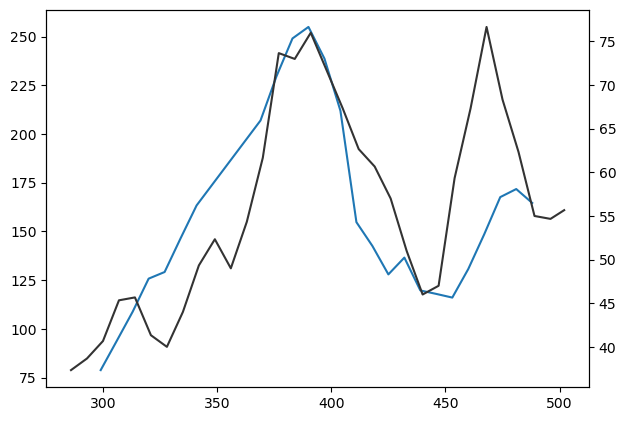

In [357]:
fl_dfg = fl_dfg.loc[fl_dfg['date']>'2020-10-03'].copy()

fig, ax = plt.subplots(1,1,figsize=(7,5),dpi=100)

ax.plot([date_dict[i] for i in fl_dfg['date']],
         (fl_dfg['new_cases_students']/fl_dfg['num_students_est']*100000).rolling(window=3).mean().values)

ax2 = ax.twinx()
ax2.plot([date_dict[i] for i in fl_hospg['date']],
         fl_hospg[child_total_cols].rolling(window=3).mean().values,color='.2')

plt.show()

In [351]:
fl_hospg

,week,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid,date
0,34,622,2020-09-06
1,35,643,2020-09-13
2,36,603,2020-09-20
3,37,48,2020-09-27
4,38,41,2020-10-04
5,39,46,2020-10-11
6,40,29,2020-10-18
7,41,41,2020-10-25
8,42,52,2020-11-01
9,43,43,2020-11-08


In [204]:
from scipy.stats import linregress